In [18]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [4]:
nutrition_test = pd.read_csv("Test_20.csv")
nutrition_train = pd.read_csv("Train_80.csv")
nutrition_test = nutrition_test.dropna()
nutrition_train = nutrition_train.dropna()
nutrition_train

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg),Price per Weight (£/100Gram),GHG(kgco3eq/100g)
0,52.0,0.17,0.26,13.81,10.39,2.4,0.028,6.0,0.12,107.0,...,29.0,7.0,51.0,0.0,0.0,0.0,0.0,0.0,0.364706,0.0357
1,19.0,0.20,0.72,3.71,2.61,1.1,0.176,24.0,0.29,250.0,...,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.0750
2,17.0,0.32,1.21,3.11,2.50,1.0,0.084,16.0,0.37,261.0,...,2125.0,11.0,91.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0455
3,62.0,0.00,0.42,15.00,13.75,0.0,0.000,0.0,0.00,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.433333,0.5752
4,412.0,10.38,9.66,74.67,24.63,9.4,1.120,101.0,2.69,501.0,...,114.0,5870.0,2390.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.0988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,884.0,100.00,0.00,0.00,0.00,0.0,13.808,1.0,0.56,1.0,...,0.0,72961.0,10523.0,0.0,0.0,0.0,0.0,0.0,0.772222,0.5944
829,350.0,34.44,6.15,5.52,3.76,0.0,20.213,97.0,0.11,132.0,...,7.0,8907.0,1483.0,10.0,20.0,0.0,0.0,0.0,0.400000,2.1240
830,35.0,1.49,2.92,4.42,0.99,4.1,0.178,254.0,1.60,348.0,...,6261.0,104.0,673.0,0.0,0.0,0.0,0.0,0.0,0.344444,0.0437
831,29.0,0.37,0.91,6.50,4.12,2.8,0.092,12.0,0.25,248.0,...,861.0,29.0,112.0,0.0,0.0,0.0,0.0,0.0,0.767442,0.0455


In [5]:
#extracting the nutrition data, labelling X as this is the input to the SKlearn algorithm
X_train = nutrition_train.iloc[:,:40]
X_test = nutrition_test.iloc[:,:40]

#extracting the price
y_test = nutrition_test.iloc[:,40:41]
y_train = nutrition_train.iloc[:,40:41]
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

In [6]:
# Pool the data
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

# Setup catboost

In [8]:
# Introduce the catboost model
model = cb.CatBoostRegressor(loss_function='RMSE')

# This uses RMSE as the loss function as it is a regression task

In [9]:
# Setup a grid search to allow for tuning. 

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 1.8435424	test: 17.5431045	best: 17.5431045 (0)	total: 61.7ms	remaining: 6.11s
1:	learn: 1.8239807	test: 17.5398682	best: 17.5398682 (1)	total: 64.9ms	remaining: 3.18s
2:	learn: 1.8041045	test: 17.5366966	best: 17.5366966 (2)	total: 66ms	remaining: 2.13s
3:	learn: 1.7851406	test: 17.5341519	best: 17.5341519 (3)	total: 67ms	remaining: 1.61s
4:	learn: 1.7690379	test: 17.5314183	best: 17.5314183 (4)	total: 68.1ms	remaining: 1.29s
5:	learn: 1.7514568	test: 17.5290955	best: 17.5290955 (5)	total: 70.5ms	remaining: 1.1s
6:	learn: 1.7357994	test: 17.5264915	best: 17.5264915 (6)	total: 71.5ms	remaining: 950ms
7:	learn: 1.7190191	test: 17.5240675	best: 17.5240675 (7)	total: 72.5ms	remaining: 833ms
8:	learn: 1.7061871	test: 17.5220211	best: 17.5220211 (8)	total: 73.4ms	remaining: 742ms
9:	learn: 1.6944170	test: 17.5198581	best: 17.5198581 (9)	total: 74.2ms	remaining: 667ms
10:	learn: 1.6801637	test: 17.5179412	best: 17.5179412 (10)	total: 75ms	remaining: 607ms
11:	learn: 1.6665920	test:

11:	learn: 1.6736816	test: 17.5157986	best: 17.5157986 (11)	total: 8.79ms	remaining: 64.5ms
12:	learn: 1.6610142	test: 17.5136324	best: 17.5136324 (12)	total: 9.6ms	remaining: 64.2ms
13:	learn: 1.6508535	test: 17.5115693	best: 17.5115693 (13)	total: 10.3ms	remaining: 63ms
14:	learn: 1.6392723	test: 17.5097931	best: 17.5097931 (14)	total: 11.1ms	remaining: 62.7ms
15:	learn: 1.6279451	test: 17.5082777	best: 17.5082777 (15)	total: 11.8ms	remaining: 61.8ms
16:	learn: 1.6174165	test: 17.5067681	best: 17.5067681 (16)	total: 12.5ms	remaining: 61.2ms
17:	learn: 1.6050604	test: 17.5051942	best: 17.5051942 (17)	total: 13.2ms	remaining: 60.2ms
18:	learn: 1.5954060	test: 17.5037549	best: 17.5037549 (18)	total: 15.2ms	remaining: 64.8ms
19:	learn: 1.5870914	test: 17.5023877	best: 17.5023877 (19)	total: 16.5ms	remaining: 66ms
20:	learn: 1.5774321	test: 17.5009105	best: 17.5009105 (20)	total: 17.9ms	remaining: 67.2ms
21:	learn: 1.5688810	test: 17.4996433	best: 17.4996433 (21)	total: 19.2ms	remaining: 

95:	learn: 0.7757533	test: 17.4633252	best: 17.4591505 (43)	total: 145ms	remaining: 6.05ms
96:	learn: 0.7741626	test: 17.4633705	best: 17.4591505 (43)	total: 150ms	remaining: 4.64ms
97:	learn: 0.7557557	test: 17.4632287	best: 17.4591505 (43)	total: 153ms	remaining: 3.12ms
98:	learn: 0.7394173	test: 17.4631784	best: 17.4591505 (43)	total: 157ms	remaining: 1.59ms
99:	learn: 0.7377944	test: 17.4632616	best: 17.4591505 (43)	total: 159ms	remaining: 0us

bestTest = 17.45915052
bestIteration = 43

3:	loss: 17.4591505	best: 17.4587387 (1)	total: 589ms	remaining: 13.5s
0:	learn: 1.8462625	test: 17.5431097	best: 17.5431097 (0)	total: 1.47ms	remaining: 146ms
1:	learn: 1.8279163	test: 17.5399373	best: 17.5399373 (1)	total: 6.33ms	remaining: 310ms
2:	learn: 1.8091534	test: 17.5368148	best: 17.5368148 (2)	total: 41.7ms	remaining: 1.35s
3:	learn: 1.7925406	test: 17.5342730	best: 17.5342730 (3)	total: 84.2ms	remaining: 2.02s
4:	learn: 1.7771490	test: 17.5315827	best: 17.5315827 (4)	total: 86.5ms	remai

19:	learn: 1.4087965	test: 17.4725198	best: 17.4725198 (19)	total: 61.2ms	remaining: 245ms
20:	learn: 1.4046516	test: 17.4712268	best: 17.4712268 (20)	total: 63.5ms	remaining: 239ms
21:	learn: 1.4002022	test: 17.4702220	best: 17.4702220 (21)	total: 64.6ms	remaining: 229ms
22:	learn: 1.3537586	test: 17.4693971	best: 17.4693971 (22)	total: 76.5ms	remaining: 256ms
23:	learn: 1.3474124	test: 17.4691757	best: 17.4691757 (23)	total: 78ms	remaining: 247ms
24:	learn: 1.3428847	test: 17.4693348	best: 17.4691757 (23)	total: 79.5ms	remaining: 238ms
25:	learn: 1.3355671	test: 17.4693159	best: 17.4691757 (23)	total: 81.4ms	remaining: 232ms
26:	learn: 1.3317853	test: 17.4671507	best: 17.4671507 (26)	total: 83.7ms	remaining: 226ms
27:	learn: 1.3271882	test: 17.4651847	best: 17.4651847 (27)	total: 85.2ms	remaining: 219ms
28:	learn: 1.3219770	test: 17.4650477	best: 17.4650477 (28)	total: 86.8ms	remaining: 213ms
29:	learn: 1.2932176	test: 17.4643122	best: 17.4643122 (29)	total: 88.2ms	remaining: 206ms
3

36:	learn: 1.5258616	test: 17.4835666	best: 17.4835666 (36)	total: 33.7ms	remaining: 57.4ms
37:	learn: 1.5212662	test: 17.4829215	best: 17.4829215 (37)	total: 35.1ms	remaining: 57.2ms
38:	learn: 1.5167181	test: 17.4823732	best: 17.4823732 (38)	total: 36.4ms	remaining: 57ms
39:	learn: 1.5125501	test: 17.4821941	best: 17.4821941 (39)	total: 37.6ms	remaining: 56.4ms
40:	learn: 1.5088599	test: 17.4814660	best: 17.4814660 (40)	total: 38.8ms	remaining: 55.8ms
41:	learn: 1.5052809	test: 17.4809267	best: 17.4809267 (41)	total: 39.6ms	remaining: 54.6ms
42:	learn: 1.4999818	test: 17.4803396	best: 17.4803396 (42)	total: 40.5ms	remaining: 53.7ms
43:	learn: 1.4969115	test: 17.4799258	best: 17.4799258 (43)	total: 41.7ms	remaining: 53.1ms
44:	learn: 1.4937499	test: 17.4793739	best: 17.4793739 (44)	total: 43ms	remaining: 52.5ms
45:	learn: 1.4904553	test: 17.4788876	best: 17.4788876 (45)	total: 44.2ms	remaining: 51.9ms
46:	learn: 1.4875042	test: 17.4784916	best: 17.4784916 (46)	total: 45.6ms	remaining:

27:	learn: 1.5133852	test: 17.4915407	best: 17.4915407 (27)	total: 28.4ms	remaining: 124ms
28:	learn: 1.5055849	test: 17.4906742	best: 17.4906742 (28)	total: 30.7ms	remaining: 128ms
29:	learn: 1.4991599	test: 17.4898361	best: 17.4898361 (29)	total: 32.5ms	remaining: 130ms
30:	learn: 1.4931472	test: 17.4889730	best: 17.4889730 (30)	total: 34.5ms	remaining: 132ms
31:	learn: 1.4886005	test: 17.4874362	best: 17.4874362 (31)	total: 37.2ms	remaining: 137ms
32:	learn: 1.4845993	test: 17.4865488	best: 17.4865488 (32)	total: 40.4ms	remaining: 143ms
33:	learn: 1.4789113	test: 17.4856178	best: 17.4856178 (33)	total: 45.3ms	remaining: 154ms
34:	learn: 1.4734693	test: 17.4846553	best: 17.4846553 (34)	total: 53.5ms	remaining: 176ms
35:	learn: 1.4688546	test: 17.4840371	best: 17.4840371 (35)	total: 55.3ms	remaining: 175ms
36:	learn: 1.4650663	test: 17.4827792	best: 17.4827792 (36)	total: 56.5ms	remaining: 173ms
37:	learn: 1.4610029	test: 17.4823773	best: 17.4823773 (37)	total: 58.6ms	remaining: 173ms

20:	learn: 1.3813995	test: 17.4712681	best: 17.4712681 (20)	total: 28.9ms	remaining: 178ms
21:	learn: 1.3773205	test: 17.4685505	best: 17.4685505 (21)	total: 32.9ms	remaining: 191ms
22:	learn: 1.2997275	test: 17.4678206	best: 17.4678206 (22)	total: 36.1ms	remaining: 200ms
23:	learn: 1.2926057	test: 17.4675356	best: 17.4675356 (23)	total: 37.2ms	remaining: 195ms
24:	learn: 1.2883643	test: 17.4675818	best: 17.4675356 (23)	total: 39.8ms	remaining: 199ms
25:	learn: 1.2808885	test: 17.4675705	best: 17.4675356 (23)	total: 41.3ms	remaining: 197ms
26:	learn: 1.2783165	test: 17.4656440	best: 17.4656440 (26)	total: 47.7ms	remaining: 217ms
27:	learn: 1.2418804	test: 17.4654085	best: 17.4654085 (27)	total: 48.8ms	remaining: 213ms
28:	learn: 1.2390587	test: 17.4653744	best: 17.4653744 (28)	total: 49.7ms	remaining: 208ms
29:	learn: 1.1739521	test: 17.4649740	best: 17.4649740 (29)	total: 50.5ms	remaining: 202ms
30:	learn: 1.1709761	test: 17.4647986	best: 17.4647986 (30)	total: 51.1ms	remaining: 196ms

69:	learn: 1.3531960	test: 17.4712338	best: 17.4711813 (68)	total: 62.5ms	remaining: 71.4ms
70:	learn: 1.3512468	test: 17.4712366	best: 17.4711813 (68)	total: 65.3ms	remaining: 72.7ms
71:	learn: 1.3499213	test: 17.4710457	best: 17.4710457 (71)	total: 68.7ms	remaining: 74.4ms
72:	learn: 1.3482665	test: 17.4709910	best: 17.4709910 (72)	total: 71.4ms	remaining: 75.3ms
73:	learn: 1.3466952	test: 17.4710044	best: 17.4709910 (72)	total: 72.4ms	remaining: 74.4ms
74:	learn: 1.3450335	test: 17.4710016	best: 17.4709910 (72)	total: 76ms	remaining: 76ms
75:	learn: 1.3430239	test: 17.4701173	best: 17.4701173 (75)	total: 81.2ms	remaining: 79ms
76:	learn: 1.3418567	test: 17.4700526	best: 17.4700526 (76)	total: 86.9ms	remaining: 82.4ms
77:	learn: 1.3398781	test: 17.4699872	best: 17.4699872 (77)	total: 87.9ms	remaining: 81.1ms
78:	learn: 1.3385693	test: 17.4698716	best: 17.4698716 (78)	total: 89ms	remaining: 80ms
79:	learn: 1.3373222	test: 17.4696822	best: 17.4696822 (79)	total: 90.3ms	remaining: 79ms


80:	learn: 0.9214698	test: 17.4613792	best: 17.4591505 (43)	total: 75.7ms	remaining: 64.5ms
81:	learn: 0.9202624	test: 17.4615553	best: 17.4591505 (43)	total: 77.6ms	remaining: 64.4ms
82:	learn: 0.9187920	test: 17.4621559	best: 17.4591505 (43)	total: 78.3ms	remaining: 63.2ms
83:	learn: 0.8871134	test: 17.4621347	best: 17.4591505 (43)	total: 78.9ms	remaining: 62ms
84:	learn: 0.8859404	test: 17.4622594	best: 17.4591505 (43)	total: 79.6ms	remaining: 60.9ms
85:	learn: 0.8573005	test: 17.4621518	best: 17.4591505 (43)	total: 80.4ms	remaining: 59.8ms
86:	learn: 0.8561399	test: 17.4624108	best: 17.4591505 (43)	total: 82ms	remaining: 59.4ms
87:	learn: 0.8543098	test: 17.4622728	best: 17.4591505 (43)	total: 85.2ms	remaining: 60ms
88:	learn: 0.8513139	test: 17.4626461	best: 17.4591505 (43)	total: 87ms	remaining: 59.6ms
89:	learn: 0.8488124	test: 17.4627866	best: 17.4591505 (43)	total: 88.3ms	remaining: 58.8ms
90:	learn: 0.8233683	test: 17.4627019	best: 17.4591505 (43)	total: 89.5ms	remaining: 58m

4:	learn: 1.6227717	test: 17.5067869	best: 17.5067869 (4)	total: 4.15ms	remaining: 120ms
5:	learn: 1.5949504	test: 17.5024166	best: 17.5024166 (5)	total: 6.08ms	remaining: 146ms
6:	learn: 1.5669427	test: 17.4973402	best: 17.4973402 (6)	total: 7.34ms	remaining: 150ms
7:	learn: 1.5418706	test: 17.4932283	best: 17.4932283 (7)	total: 8.52ms	remaining: 151ms
8:	learn: 1.5241002	test: 17.4905136	best: 17.4905136 (8)	total: 9.74ms	remaining: 153ms
9:	learn: 1.5076292	test: 17.4870535	best: 17.4870535 (9)	total: 10.9ms	remaining: 152ms
10:	learn: 1.4917005	test: 17.4846399	best: 17.4846399 (10)	total: 12.3ms	remaining: 155ms
11:	learn: 1.4788439	test: 17.4824686	best: 17.4824686 (11)	total: 13.5ms	remaining: 155ms
12:	learn: 1.4654462	test: 17.4792538	best: 17.4792538 (12)	total: 14.7ms	remaining: 155ms
13:	learn: 1.4568602	test: 17.4769425	best: 17.4769425 (13)	total: 15.9ms	remaining: 154ms
14:	learn: 1.4482033	test: 17.4768346	best: 17.4768346 (14)	total: 17.1ms	remaining: 154ms
15:	learn: 

40:	learn: 1.5088599	test: 17.4814660	best: 17.4814660 (40)	total: 30.7ms	remaining: 81.6ms
41:	learn: 1.5052809	test: 17.4809267	best: 17.4809267 (41)	total: 31.6ms	remaining: 81.2ms
42:	learn: 1.4999818	test: 17.4803396	best: 17.4803396 (42)	total: 33.3ms	remaining: 83ms
43:	learn: 1.4969115	test: 17.4799258	best: 17.4799258 (43)	total: 34.5ms	remaining: 83.2ms
44:	learn: 1.4937499	test: 17.4793739	best: 17.4793739 (44)	total: 35.8ms	remaining: 83.5ms
45:	learn: 1.4904553	test: 17.4788876	best: 17.4788876 (45)	total: 37ms	remaining: 83.6ms
46:	learn: 1.4875042	test: 17.4784916	best: 17.4784916 (46)	total: 38.6ms	remaining: 84.6ms
47:	learn: 1.4848662	test: 17.4778090	best: 17.4778090 (47)	total: 39.9ms	remaining: 84.7ms
48:	learn: 1.4820142	test: 17.4772799	best: 17.4772799 (48)	total: 41.1ms	remaining: 84.7ms
49:	learn: 1.4792100	test: 17.4767991	best: 17.4767991 (49)	total: 42.3ms	remaining: 84.6ms
50:	learn: 1.4760703	test: 17.4766082	best: 17.4766082 (50)	total: 43.5ms	remaining:

140:	learn: 0.7033909	test: 17.4634778	best: 17.4614071 (102)	total: 98.2ms	remaining: 6.27ms
141:	learn: 0.7012479	test: 17.4632515	best: 17.4614071 (102)	total: 100ms	remaining: 5.65ms
142:	learn: 0.7004769	test: 17.4633151	best: 17.4614071 (102)	total: 101ms	remaining: 4.95ms
143:	learn: 0.6995160	test: 17.4628108	best: 17.4614071 (102)	total: 102ms	remaining: 4.24ms
144:	learn: 0.6954949	test: 17.4631672	best: 17.4614071 (102)	total: 102ms	remaining: 3.53ms
145:	learn: 0.6946773	test: 17.4632449	best: 17.4614071 (102)	total: 104ms	remaining: 2.85ms
146:	learn: 0.6935030	test: 17.4633145	best: 17.4614071 (102)	total: 106ms	remaining: 2.15ms
147:	learn: 0.6929459	test: 17.4632994	best: 17.4614071 (102)	total: 108ms	remaining: 1.46ms
148:	learn: 0.6890840	test: 17.4633300	best: 17.4614071 (102)	total: 110ms	remaining: 735us
149:	learn: 0.6878825	test: 17.4633563	best: 17.4614071 (102)	total: 111ms	remaining: 0us

bestTest = 17.46140713
bestIteration = 102

15:	loss: 17.4614071	best: 1

194:	learn: 0.9966920	test: 17.4656608	best: 17.4642996 (129)	total: 172ms	remaining: 4.42ms
195:	learn: 0.9903231	test: 17.4656811	best: 17.4642996 (129)	total: 174ms	remaining: 3.56ms
196:	learn: 0.9841184	test: 17.4655444	best: 17.4642996 (129)	total: 176ms	remaining: 2.67ms
197:	learn: 0.9834859	test: 17.4655831	best: 17.4642996 (129)	total: 177ms	remaining: 1.79ms
198:	learn: 0.9745186	test: 17.4654736	best: 17.4642996 (129)	total: 180ms	remaining: 905us
199:	learn: 0.9738451	test: 17.4655269	best: 17.4642996 (129)	total: 183ms	remaining: 0us

bestTest = 17.46429956
bestIteration = 129

16:	loss: 17.4642996	best: 17.4587387 (1)	total: 3.03s	remaining: 14.1s
0:	learn: 1.7948796	test: 17.5361328	best: 17.5361328 (0)	total: 2.91ms	remaining: 578ms
1:	learn: 1.7372666	test: 17.5265343	best: 17.5265343 (1)	total: 6.05ms	remaining: 600ms
2:	learn: 1.6845657	test: 17.5180014	best: 17.5180014 (2)	total: 11ms	remaining: 721ms
3:	learn: 1.6388467	test: 17.5108157	best: 17.5108157 (3)	total:

198:	learn: 0.5637708	test: 17.4704335	best: 17.4587387 (39)	total: 176ms	remaining: 886us
199:	learn: 0.5631090	test: 17.4704845	best: 17.4587387 (39)	total: 178ms	remaining: 0us

bestTest = 17.45873871
bestIteration = 39

17:	loss: 17.4587387	best: 17.4587387 (1)	total: 3.23s	remaining: 14s
0:	learn: 1.8447627	test: 17.5431064	best: 17.5431064 (0)	total: 836us	remaining: 166ms
1:	learn: 1.8256923	test: 17.5398960	best: 17.5398960 (1)	total: 2.15ms	remaining: 213ms
2:	learn: 1.8062584	test: 17.5367437	best: 17.5367437 (2)	total: 5.58ms	remaining: 366ms
3:	learn: 1.7883389	test: 17.5342001	best: 17.5342001 (3)	total: 7.79ms	remaining: 382ms
4:	learn: 1.7725149	test: 17.5314838	best: 17.5314838 (4)	total: 9.25ms	remaining: 361ms
5:	learn: 1.7558788	test: 17.5291781	best: 17.5291781 (5)	total: 10.4ms	remaining: 338ms
6:	learn: 1.7404831	test: 17.5265782	best: 17.5265782 (6)	total: 11.7ms	remaining: 322ms
7:	learn: 1.7245869	test: 17.5241632	best: 17.5241632 (7)	total: 13.2ms	remaining: 3

196:	learn: 1.0283034	test: 17.4643469	best: 17.4636828 (181)	total: 185ms	remaining: 2.82ms
197:	learn: 1.0277532	test: 17.4642463	best: 17.4636828 (181)	total: 187ms	remaining: 1.89ms
198:	learn: 1.0186650	test: 17.4641346	best: 17.4636828 (181)	total: 189ms	remaining: 948us
199:	learn: 1.0180771	test: 17.4641880	best: 17.4636828 (181)	total: 190ms	remaining: 0us

bestTest = 17.46368283
bestIteration = 181

18:	loss: 17.4636828	best: 17.4587387 (1)	total: 3.43s	remaining: 13.9s
0:	learn: 1.7987976	test: 17.5361391	best: 17.5361391 (0)	total: 3.5ms	remaining: 696ms
1:	learn: 1.7424113	test: 17.5266055	best: 17.5266055 (1)	total: 4.91ms	remaining: 486ms
2:	learn: 1.6905400	test: 17.5181025	best: 17.5181025 (2)	total: 6.04ms	remaining: 396ms
3:	learn: 1.6474993	test: 17.5119555	best: 17.5119555 (3)	total: 6.71ms	remaining: 329ms
4:	learn: 1.6105163	test: 17.5065769	best: 17.5065769 (4)	total: 7.54ms	remaining: 294ms
5:	learn: 1.5828860	test: 17.5022338	best: 17.5022338 (5)	total: 8.76ms

14:	learn: 1.6507702	test: 17.5102508	best: 17.5102508 (14)	total: 10.4ms	remaining: 129ms
15:	learn: 1.6395701	test: 17.5087219	best: 17.5087219 (15)	total: 11.5ms	remaining: 132ms
16:	learn: 1.6295870	test: 17.5072091	best: 17.5072091 (16)	total: 13.4ms	remaining: 144ms
17:	learn: 1.6199182	test: 17.5056327	best: 17.5056327 (17)	total: 14.9ms	remaining: 151ms
18:	learn: 1.6107370	test: 17.5041891	best: 17.5041891 (18)	total: 17.4ms	remaining: 166ms
19:	learn: 1.6024487	test: 17.5028101	best: 17.5028101 (19)	total: 18.7ms	remaining: 168ms
20:	learn: 1.5929936	test: 17.5013225	best: 17.5013225 (20)	total: 19.9ms	remaining: 170ms
21:	learn: 1.5848096	test: 17.5000500	best: 17.5000500 (21)	total: 21.1ms	remaining: 171ms
22:	learn: 1.5777967	test: 17.4987874	best: 17.4987874 (22)	total: 22.4ms	remaining: 172ms
23:	learn: 1.5702412	test: 17.4975225	best: 17.4975225 (23)	total: 23.5ms	remaining: 173ms
24:	learn: 1.5621775	test: 17.4962821	best: 17.4962821 (24)	total: 24.9ms	remaining: 174ms

48:	learn: 1.0743511	test: 17.4606009	best: 17.4596988 (45)	total: 33.8ms	remaining: 104ms
49:	learn: 1.0715896	test: 17.4605973	best: 17.4596988 (45)	total: 36.1ms	remaining: 108ms
50:	learn: 1.0675875	test: 17.4608101	best: 17.4596988 (45)	total: 37.8ms	remaining: 110ms
51:	learn: 1.0656063	test: 17.4609566	best: 17.4596988 (45)	total: 39ms	remaining: 111ms
52:	learn: 1.0487138	test: 17.4610551	best: 17.4596988 (45)	total: 40.2ms	remaining: 112ms
53:	learn: 1.0466864	test: 17.4595283	best: 17.4595283 (53)	total: 41.2ms	remaining: 112ms
54:	learn: 1.0453287	test: 17.4594487	best: 17.4594487 (54)	total: 42.5ms	remaining: 112ms
55:	learn: 1.0419048	test: 17.4599716	best: 17.4594487 (54)	total: 43.6ms	remaining: 112ms
56:	learn: 1.0400477	test: 17.4603729	best: 17.4594487 (54)	total: 44.8ms	remaining: 112ms
57:	learn: 1.0386588	test: 17.4606067	best: 17.4594487 (54)	total: 46.1ms	remaining: 113ms
58:	learn: 1.0361003	test: 17.4608964	best: 17.4594487 (54)	total: 47.4ms	remaining: 113ms
5

32:	learn: 1.5442154	test: 17.4872513	best: 17.4872513 (32)	total: 37.6ms	remaining: 190ms
33:	learn: 1.5394522	test: 17.4863112	best: 17.4863112 (33)	total: 42.4ms	remaining: 207ms
34:	learn: 1.5350028	test: 17.4855808	best: 17.4855808 (34)	total: 44.8ms	remaining: 211ms
35:	learn: 1.5299391	test: 17.4848261	best: 17.4848261 (35)	total: 53.8ms	remaining: 245ms
36:	learn: 1.5258616	test: 17.4835666	best: 17.4835666 (36)	total: 57.6ms	remaining: 254ms
37:	learn: 1.5212662	test: 17.4829215	best: 17.4829215 (37)	total: 58.8ms	remaining: 251ms
38:	learn: 1.5167181	test: 17.4823732	best: 17.4823732 (38)	total: 59.5ms	remaining: 246ms
39:	learn: 1.5125501	test: 17.4821941	best: 17.4821941 (39)	total: 60.2ms	remaining: 241ms
40:	learn: 1.5088599	test: 17.4814660	best: 17.4814660 (40)	total: 60.8ms	remaining: 236ms
41:	learn: 1.5052809	test: 17.4809267	best: 17.4809267 (41)	total: 61.5ms	remaining: 231ms
42:	learn: 1.4999818	test: 17.4803396	best: 17.4803396 (42)	total: 62.3ms	remaining: 228ms

24:	learn: 1.4180960	test: 17.4666106	best: 17.4666106 (24)	total: 21.8ms	remaining: 153ms
25:	learn: 1.4107724	test: 17.4665303	best: 17.4665303 (25)	total: 24.9ms	remaining: 166ms
26:	learn: 1.4077664	test: 17.4643246	best: 17.4643246 (26)	total: 26.3ms	remaining: 169ms
27:	learn: 1.4041298	test: 17.4639945	best: 17.4639945 (27)	total: 27.6ms	remaining: 170ms
28:	learn: 1.4008001	test: 17.4636964	best: 17.4636964 (28)	total: 28.7ms	remaining: 169ms
29:	learn: 1.3775261	test: 17.4631289	best: 17.4631289 (29)	total: 29.8ms	remaining: 169ms
30:	learn: 1.3744088	test: 17.4629044	best: 17.4629044 (30)	total: 31.1ms	remaining: 169ms
31:	learn: 1.3704922	test: 17.4628146	best: 17.4628146 (31)	total: 32.3ms	remaining: 170ms
32:	learn: 1.3677055	test: 17.4628463	best: 17.4628146 (31)	total: 33.5ms	remaining: 170ms
33:	learn: 1.3455976	test: 17.4628186	best: 17.4628146 (31)	total: 36.7ms	remaining: 179ms
34:	learn: 1.3422661	test: 17.4627515	best: 17.4627515 (34)	total: 38.2ms	remaining: 180ms

0:	learn: 1.8337687	test: 17.5426846	best: 17.5426846 (0)	total: 3.52ms	remaining: 348ms
1:	learn: 1.8117117	test: 17.5399419	best: 17.5399419 (1)	total: 10.2ms	remaining: 499ms
2:	learn: 1.7905269	test: 17.5370694	best: 17.5370694 (2)	total: 13ms	remaining: 419ms
3:	learn: 1.7664188	test: 17.5344184	best: 17.5344184 (3)	total: 17.1ms	remaining: 411ms
4:	learn: 1.7465813	test: 17.5319262	best: 17.5319262 (4)	total: 20.2ms	remaining: 384ms
5:	learn: 1.7291641	test: 17.5295268	best: 17.5295268 (5)	total: 21.6ms	remaining: 339ms
6:	learn: 1.7119316	test: 17.5266498	best: 17.5266498 (6)	total: 23ms	remaining: 306ms
7:	learn: 1.6956016	test: 17.5238342	best: 17.5238342 (7)	total: 24.5ms	remaining: 281ms
8:	learn: 1.6788167	test: 17.5218478	best: 17.5218478 (8)	total: 27.9ms	remaining: 282ms
9:	learn: 1.6627217	test: 17.5190195	best: 17.5190195 (9)	total: 31.6ms	remaining: 284ms
10:	learn: 1.6485539	test: 17.5168313	best: 17.5168313 (10)	total: 33ms	remaining: 267ms
11:	learn: 1.6337647	test

5:	learn: 1.4987004	test: 17.5016405	best: 17.5016405 (5)	total: 8.9ms	remaining: 139ms
6:	learn: 1.4703250	test: 17.4972520	best: 17.4972520 (6)	total: 11.5ms	remaining: 153ms
7:	learn: 1.4419645	test: 17.4934553	best: 17.4934553 (7)	total: 14.4ms	remaining: 166ms
8:	learn: 1.4198107	test: 17.4894632	best: 17.4894632 (8)	total: 17.1ms	remaining: 173ms
9:	learn: 1.4003427	test: 17.4868665	best: 17.4868665 (9)	total: 20.8ms	remaining: 187ms
10:	learn: 1.3765885	test: 17.4838603	best: 17.4838603 (10)	total: 22.2ms	remaining: 180ms
11:	learn: 1.3594003	test: 17.4817530	best: 17.4817530 (11)	total: 23.7ms	remaining: 174ms
12:	learn: 1.3450314	test: 17.4792357	best: 17.4792357 (12)	total: 25.1ms	remaining: 168ms
13:	learn: 1.3323206	test: 17.4759102	best: 17.4759102 (13)	total: 26.5ms	remaining: 163ms
14:	learn: 1.2552352	test: 17.4742863	best: 17.4742863 (14)	total: 27.9ms	remaining: 158ms
15:	learn: 1.2468580	test: 17.4727930	best: 17.4727930 (15)	total: 29.3ms	remaining: 154ms
16:	learn:

15:	learn: 1.5890307	test: 17.5082645	best: 17.5082645 (15)	total: 44.5ms	remaining: 233ms
16:	learn: 1.5733206	test: 17.5066237	best: 17.5066237 (16)	total: 47.5ms	remaining: 232ms
17:	learn: 1.5490578	test: 17.5051061	best: 17.5051061 (17)	total: 50.3ms	remaining: 229ms
18:	learn: 1.5386452	test: 17.5033304	best: 17.5033304 (18)	total: 58.6ms	remaining: 250ms
19:	learn: 1.5288000	test: 17.5018998	best: 17.5018998 (19)	total: 60ms	remaining: 240ms
20:	learn: 1.5088203	test: 17.5002508	best: 17.5002508 (20)	total: 62ms	remaining: 233ms
21:	learn: 1.4995981	test: 17.4991730	best: 17.4991730 (21)	total: 64ms	remaining: 227ms
22:	learn: 1.4900835	test: 17.4979151	best: 17.4979151 (22)	total: 65.8ms	remaining: 220ms
23:	learn: 1.4799914	test: 17.4968054	best: 17.4968054 (23)	total: 68ms	remaining: 215ms
24:	learn: 1.4571041	test: 17.4955821	best: 17.4955821 (24)	total: 70.7ms	remaining: 212ms
25:	learn: 1.4487157	test: 17.4944961	best: 17.4944961 (25)	total: 73.7ms	remaining: 210ms
26:	lea

92:	learn: 0.5168335	test: 17.4760821	best: 17.4617220 (35)	total: 137ms	remaining: 10.3ms
93:	learn: 0.5145290	test: 17.4771326	best: 17.4617220 (35)	total: 139ms	remaining: 8.86ms
94:	learn: 0.5123335	test: 17.4772546	best: 17.4617220 (35)	total: 141ms	remaining: 7.44ms
95:	learn: 0.5089303	test: 17.4775467	best: 17.4617220 (35)	total: 145ms	remaining: 6.03ms
96:	learn: 0.5067171	test: 17.4775379	best: 17.4617220 (35)	total: 147ms	remaining: 4.56ms
97:	learn: 0.5034561	test: 17.4787664	best: 17.4617220 (35)	total: 150ms	remaining: 3.07ms
98:	learn: 0.4994183	test: 17.4786023	best: 17.4617220 (35)	total: 155ms	remaining: 1.57ms
99:	learn: 0.4962758	test: 17.4785021	best: 17.4617220 (35)	total: 157ms	remaining: 0us

bestTest = 17.46172197
bestIteration = 35

27:	loss: 17.4617220	best: 17.4587387 (1)	total: 5.26s	remaining: 12.8s
0:	learn: 1.8459074	test: 17.5426827	best: 17.5426827 (0)	total: 2.46ms	remaining: 244ms
1:	learn: 1.8267380	test: 17.5399730	best: 17.5399730 (1)	total: 4.11m

99:	learn: 0.9857012	test: 17.4675413	best: 17.4675413 (99)	total: 171ms	remaining: 0us

bestTest = 17.46754134
bestIteration = 99

28:	loss: 17.4675413	best: 17.4587387 (1)	total: 5.45s	remaining: 12.6s
0:	learn: 1.8024741	test: 17.5347330	best: 17.5347330 (0)	total: 7.35ms	remaining: 728ms
1:	learn: 1.7455466	test: 17.5267598	best: 17.5267598 (1)	total: 11.8ms	remaining: 578ms
2:	learn: 1.6968579	test: 17.5200215	best: 17.5200215 (2)	total: 13.7ms	remaining: 444ms
3:	learn: 1.6560789	test: 17.5129961	best: 17.5129961 (3)	total: 15.2ms	remaining: 365ms
4:	learn: 1.6182526	test: 17.5077840	best: 17.5077840 (4)	total: 16.8ms	remaining: 320ms
5:	learn: 1.5900065	test: 17.5022216	best: 17.5022216 (5)	total: 21.9ms	remaining: 343ms
6:	learn: 1.5592219	test: 17.4976158	best: 17.4976158 (6)	total: 25.3ms	remaining: 336ms
7:	learn: 1.5315010	test: 17.4937756	best: 17.4937756 (7)	total: 28ms	remaining: 322ms
8:	learn: 1.5110233	test: 17.4907005	best: 17.4907005 (8)	total: 29.4ms	remaining: 297

18:	learn: 1.6223997	test: 17.5040736	best: 17.5040736 (18)	total: 28.4ms	remaining: 121ms
19:	learn: 1.6143802	test: 17.5026592	best: 17.5026592 (19)	total: 34.3ms	remaining: 137ms
20:	learn: 1.6064138	test: 17.5011920	best: 17.5011920 (20)	total: 37.4ms	remaining: 141ms
21:	learn: 1.5978435	test: 17.5001263	best: 17.5001263 (21)	total: 40.3ms	remaining: 143ms
22:	learn: 1.5895188	test: 17.4989115	best: 17.4989115 (22)	total: 42.4ms	remaining: 142ms
23:	learn: 1.5811879	test: 17.4977921	best: 17.4977921 (23)	total: 45.3ms	remaining: 143ms
24:	learn: 1.5693451	test: 17.4966887	best: 17.4966887 (24)	total: 48.2ms	remaining: 145ms
25:	learn: 1.5607505	test: 17.4956369	best: 17.4956369 (25)	total: 51.1ms	remaining: 145ms
26:	learn: 1.5494729	test: 17.4943066	best: 17.4943066 (26)	total: 52.8ms	remaining: 143ms
27:	learn: 1.5425228	test: 17.4934553	best: 17.4934553 (27)	total: 56.5ms	remaining: 145ms
28:	learn: 1.5367276	test: 17.4923278	best: 17.4923278 (28)	total: 59.5ms	remaining: 146ms

0:	learn: 1.8337687	test: 17.5426846	best: 17.5426846 (0)	total: 5.05ms	remaining: 753ms
1:	learn: 1.8117117	test: 17.5399419	best: 17.5399419 (1)	total: 20.3ms	remaining: 1.5s
2:	learn: 1.7905269	test: 17.5370694	best: 17.5370694 (2)	total: 22.2ms	remaining: 1.09s
3:	learn: 1.7664188	test: 17.5344184	best: 17.5344184 (3)	total: 23.6ms	remaining: 861ms
4:	learn: 1.7465813	test: 17.5319262	best: 17.5319262 (4)	total: 25ms	remaining: 724ms
5:	learn: 1.7291641	test: 17.5295268	best: 17.5295268 (5)	total: 26.4ms	remaining: 633ms
6:	learn: 1.7119316	test: 17.5266498	best: 17.5266498 (6)	total: 27.7ms	remaining: 566ms
7:	learn: 1.6956016	test: 17.5238342	best: 17.5238342 (7)	total: 29.4ms	remaining: 521ms
8:	learn: 1.6788167	test: 17.5218478	best: 17.5218478 (8)	total: 31.6ms	remaining: 495ms
9:	learn: 1.6627217	test: 17.5190195	best: 17.5190195 (9)	total: 34.4ms	remaining: 482ms
10:	learn: 1.6485539	test: 17.5168313	best: 17.5168313 (10)	total: 35.9ms	remaining: 454ms
11:	learn: 1.6337647	t

94:	learn: 0.8690770	test: 17.4670700	best: 17.4670700 (94)	total: 197ms	remaining: 114ms
95:	learn: 0.8589145	test: 17.4670628	best: 17.4670628 (95)	total: 205ms	remaining: 115ms
96:	learn: 0.8499583	test: 17.4669599	best: 17.4669599 (96)	total: 209ms	remaining: 114ms
97:	learn: 0.8465336	test: 17.4668579	best: 17.4668579 (97)	total: 211ms	remaining: 112ms
98:	learn: 0.8447973	test: 17.4666849	best: 17.4666849 (98)	total: 213ms	remaining: 110ms
99:	learn: 0.8363419	test: 17.4665387	best: 17.4665387 (99)	total: 218ms	remaining: 109ms
100:	learn: 0.8350129	test: 17.4664425	best: 17.4664425 (100)	total: 220ms	remaining: 107ms
101:	learn: 0.8266441	test: 17.4664789	best: 17.4664425 (100)	total: 221ms	remaining: 104ms
102:	learn: 0.8245207	test: 17.4665087	best: 17.4664425 (100)	total: 224ms	remaining: 102ms
103:	learn: 0.8229641	test: 17.4665750	best: 17.4664425 (100)	total: 227ms	remaining: 100ms
104:	learn: 0.8194840	test: 17.4662738	best: 17.4662738 (104)	total: 229ms	remaining: 98.2ms

44:	learn: 0.7059717	test: 17.4618237	best: 17.4609150 (40)	total: 86.3ms	remaining: 201ms
45:	learn: 0.7019367	test: 17.4617978	best: 17.4609150 (40)	total: 89.2ms	remaining: 202ms
46:	learn: 0.6967846	test: 17.4614696	best: 17.4609150 (40)	total: 92ms	remaining: 202ms
47:	learn: 0.6910884	test: 17.4617691	best: 17.4609150 (40)	total: 94.9ms	remaining: 202ms
48:	learn: 0.6884287	test: 17.4615749	best: 17.4609150 (40)	total: 96.5ms	remaining: 199ms
49:	learn: 0.6864791	test: 17.4620764	best: 17.4609150 (40)	total: 97.9ms	remaining: 196ms
50:	learn: 0.6819779	test: 17.4621508	best: 17.4609150 (40)	total: 99.6ms	remaining: 193ms
51:	learn: 0.6654398	test: 17.4621651	best: 17.4609150 (40)	total: 104ms	remaining: 196ms
52:	learn: 0.6622712	test: 17.4631716	best: 17.4609150 (40)	total: 107ms	remaining: 197ms
53:	learn: 0.6472522	test: 17.4630950	best: 17.4609150 (40)	total: 113ms	remaining: 201ms
54:	learn: 0.6438218	test: 17.4631452	best: 17.4609150 (40)	total: 115ms	remaining: 199ms
55:	l

11:	learn: 1.6471589	test: 17.5159226	best: 17.5159226 (11)	total: 18.1ms	remaining: 208ms
12:	learn: 1.6263122	test: 17.5145657	best: 17.5145657 (12)	total: 20.4ms	remaining: 215ms
13:	learn: 1.6137151	test: 17.5120242	best: 17.5120242 (13)	total: 25.5ms	remaining: 248ms
14:	learn: 1.6005142	test: 17.5102008	best: 17.5102008 (14)	total: 28.2ms	remaining: 254ms
15:	learn: 1.5890307	test: 17.5082645	best: 17.5082645 (15)	total: 31ms	remaining: 260ms
16:	learn: 1.5733206	test: 17.5066237	best: 17.5066237 (16)	total: 36.9ms	remaining: 288ms
17:	learn: 1.5490578	test: 17.5051061	best: 17.5051061 (17)	total: 40.9ms	remaining: 300ms
18:	learn: 1.5386452	test: 17.5033304	best: 17.5033304 (18)	total: 48.7ms	remaining: 336ms
19:	learn: 1.5288000	test: 17.5018998	best: 17.5018998 (19)	total: 53.5ms	remaining: 348ms
20:	learn: 1.5088203	test: 17.5002508	best: 17.5002508 (20)	total: 60.1ms	remaining: 369ms
21:	learn: 1.4995981	test: 17.4991730	best: 17.4991730 (21)	total: 62.9ms	remaining: 366ms
2

31:	learn: 0.9517475	test: 17.4621672	best: 17.4621672 (31)	total: 67.1ms	remaining: 247ms
32:	learn: 0.9177917	test: 17.4621704	best: 17.4621672 (31)	total: 69.6ms	remaining: 247ms
33:	learn: 0.8875084	test: 17.4621655	best: 17.4621655 (33)	total: 72.6ms	remaining: 248ms
34:	learn: 0.8604723	test: 17.4618039	best: 17.4618039 (34)	total: 75.6ms	remaining: 249ms
35:	learn: 0.8559225	test: 17.4617220	best: 17.4617220 (35)	total: 80.6ms	remaining: 255ms
36:	learn: 0.8519741	test: 17.4621315	best: 17.4617220 (35)	total: 85.7ms	remaining: 262ms
37:	learn: 0.8358208	test: 17.4619608	best: 17.4617220 (35)	total: 93.5ms	remaining: 276ms
38:	learn: 0.8281542	test: 17.4620127	best: 17.4617220 (35)	total: 96.1ms	remaining: 274ms
39:	learn: 0.8138378	test: 17.4621965	best: 17.4617220 (35)	total: 98.7ms	remaining: 271ms
40:	learn: 0.7909655	test: 17.4621311	best: 17.4617220 (35)	total: 101ms	remaining: 268ms
41:	learn: 0.7871696	test: 17.4621655	best: 17.4617220 (35)	total: 104ms	remaining: 269ms
4

138:	learn: 0.3994200	test: 17.4872605	best: 17.4617220 (35)	total: 260ms	remaining: 20.6ms
139:	learn: 0.3964396	test: 17.4867014	best: 17.4617220 (35)	total: 263ms	remaining: 18.8ms
140:	learn: 0.3941377	test: 17.4869270	best: 17.4617220 (35)	total: 266ms	remaining: 17ms
141:	learn: 0.3932731	test: 17.4869693	best: 17.4617220 (35)	total: 269ms	remaining: 15.2ms
142:	learn: 0.3900720	test: 17.4868498	best: 17.4617220 (35)	total: 271ms	remaining: 13.2ms
143:	learn: 0.3878942	test: 17.4878654	best: 17.4617220 (35)	total: 272ms	remaining: 11.3ms
144:	learn: 0.3857281	test: 17.4878666	best: 17.4617220 (35)	total: 274ms	remaining: 9.43ms
145:	learn: 0.3829900	test: 17.4880394	best: 17.4617220 (35)	total: 275ms	remaining: 7.54ms
146:	learn: 0.3807538	test: 17.4881390	best: 17.4617220 (35)	total: 276ms	remaining: 5.64ms
147:	learn: 0.3796368	test: 17.4881522	best: 17.4617220 (35)	total: 278ms	remaining: 3.75ms
148:	learn: 0.3786872	test: 17.4882188	best: 17.4617220 (35)	total: 283ms	remainin

11:	learn: 1.4257733	test: 17.4831869	best: 17.4831869 (11)	total: 61.3ms	remaining: 705ms
12:	learn: 1.3887802	test: 17.4817551	best: 17.4817551 (12)	total: 68.2ms	remaining: 719ms
13:	learn: 1.3742213	test: 17.4793520	best: 17.4793520 (13)	total: 71.2ms	remaining: 692ms
14:	learn: 1.3208926	test: 17.4780100	best: 17.4780100 (14)	total: 77.4ms	remaining: 696ms
15:	learn: 1.2906444	test: 17.4775439	best: 17.4775439 (15)	total: 80.5ms	remaining: 675ms
16:	learn: 1.2798085	test: 17.4760414	best: 17.4760414 (16)	total: 83.2ms	remaining: 651ms
17:	learn: 1.2674434	test: 17.4750026	best: 17.4750026 (17)	total: 85.5ms	remaining: 627ms
18:	learn: 1.2335775	test: 17.4742756	best: 17.4742756 (18)	total: 87.6ms	remaining: 604ms
19:	learn: 1.1935491	test: 17.4734736	best: 17.4734736 (19)	total: 89.8ms	remaining: 584ms
20:	learn: 1.1556071	test: 17.4721726	best: 17.4721726 (20)	total: 91.9ms	remaining: 564ms
21:	learn: 1.1172694	test: 17.4706606	best: 17.4706606 (21)	total: 94.5ms	remaining: 550ms

37:	learn: 1.4782059	test: 17.4843890	best: 17.4843890 (37)	total: 81.5ms	remaining: 240ms
38:	learn: 1.4729154	test: 17.4837945	best: 17.4837945 (38)	total: 85.1ms	remaining: 242ms
39:	learn: 1.4621297	test: 17.4833676	best: 17.4833676 (39)	total: 87.8ms	remaining: 241ms
40:	learn: 1.4571410	test: 17.4828129	best: 17.4828129 (40)	total: 90.6ms	remaining: 241ms
41:	learn: 1.4524201	test: 17.4825031	best: 17.4825031 (41)	total: 93.4ms	remaining: 240ms
42:	learn: 1.4425723	test: 17.4818463	best: 17.4818463 (42)	total: 97ms	remaining: 241ms
43:	learn: 1.4388748	test: 17.4812202	best: 17.4812202 (43)	total: 98.5ms	remaining: 237ms
44:	learn: 1.4341274	test: 17.4806151	best: 17.4806151 (44)	total: 99.8ms	remaining: 233ms
45:	learn: 1.4284915	test: 17.4800872	best: 17.4800872 (45)	total: 101ms	remaining: 229ms
46:	learn: 1.4232548	test: 17.4798007	best: 17.4798007 (46)	total: 103ms	remaining: 225ms
47:	learn: 1.4195092	test: 17.4789822	best: 17.4789822 (47)	total: 104ms	remaining: 221ms
48:	

11:	learn: 1.4549159	test: 17.4772137	best: 17.4772137 (11)	total: 17.3ms	remaining: 198ms
12:	learn: 1.4268166	test: 17.4762041	best: 17.4762041 (12)	total: 19.9ms	remaining: 209ms
13:	learn: 1.3959700	test: 17.4738658	best: 17.4738658 (13)	total: 22.6ms	remaining: 219ms
14:	learn: 1.3837765	test: 17.4722610	best: 17.4722610 (14)	total: 25.3ms	remaining: 228ms
15:	learn: 1.3714591	test: 17.4715652	best: 17.4715652 (15)	total: 28.1ms	remaining: 235ms
16:	learn: 1.3509282	test: 17.4703698	best: 17.4703698 (16)	total: 29.7ms	remaining: 232ms
17:	learn: 1.3243507	test: 17.4690359	best: 17.4690359 (17)	total: 31.2ms	remaining: 229ms
18:	learn: 1.3037784	test: 17.4674041	best: 17.4674041 (18)	total: 32.6ms	remaining: 225ms
19:	learn: 1.2965291	test: 17.4664042	best: 17.4664042 (19)	total: 34.2ms	remaining: 222ms
20:	learn: 1.2725479	test: 17.4653026	best: 17.4653026 (20)	total: 38.2ms	remaining: 235ms
21:	learn: 1.2656205	test: 17.4651430	best: 17.4651430 (21)	total: 40.4ms	remaining: 235ms

31:	learn: 1.3773647	test: 17.4878785	best: 17.4878785 (31)	total: 46.4ms	remaining: 243ms
32:	learn: 1.3531246	test: 17.4869314	best: 17.4869314 (32)	total: 50ms	remaining: 253ms
33:	learn: 1.3478085	test: 17.4861625	best: 17.4861625 (33)	total: 52.7ms	remaining: 257ms
34:	learn: 1.3245251	test: 17.4853598	best: 17.4853598 (34)	total: 55.3ms	remaining: 261ms
35:	learn: 1.3187875	test: 17.4840764	best: 17.4840764 (35)	total: 58ms	remaining: 264ms
36:	learn: 1.3126843	test: 17.4836077	best: 17.4836077 (36)	total: 62.5ms	remaining: 275ms
37:	learn: 1.2986724	test: 17.4829519	best: 17.4829519 (37)	total: 65.5ms	remaining: 279ms
38:	learn: 1.2938457	test: 17.4823409	best: 17.4823409 (38)	total: 69.9ms	remaining: 289ms
39:	learn: 1.2802197	test: 17.4818052	best: 17.4818052 (39)	total: 71.9ms	remaining: 288ms
40:	learn: 1.2756679	test: 17.4812416	best: 17.4812416 (40)	total: 74.1ms	remaining: 287ms
41:	learn: 1.2691653	test: 17.4809338	best: 17.4809338 (41)	total: 76.2ms	remaining: 287ms
42:

137:	learn: 0.7207209	test: 17.4656885	best: 17.4652748 (132)	total: 239ms	remaining: 107ms
138:	learn: 0.7148414	test: 17.4656908	best: 17.4652748 (132)	total: 242ms	remaining: 106ms
139:	learn: 0.7135723	test: 17.4655314	best: 17.4652748 (132)	total: 245ms	remaining: 105ms
140:	learn: 0.7123089	test: 17.4655664	best: 17.4652748 (132)	total: 248ms	remaining: 104ms
141:	learn: 0.7096218	test: 17.4655594	best: 17.4652748 (132)	total: 249ms	remaining: 102ms
142:	learn: 0.7084825	test: 17.4651481	best: 17.4651481 (142)	total: 252ms	remaining: 100ms
143:	learn: 0.7075334	test: 17.4650427	best: 17.4650427 (143)	total: 254ms	remaining: 98.6ms
144:	learn: 0.7063654	test: 17.4646583	best: 17.4646583 (144)	total: 255ms	remaining: 96.8ms
145:	learn: 0.7045891	test: 17.4647888	best: 17.4646583 (144)	total: 257ms	remaining: 94.9ms
146:	learn: 0.6992631	test: 17.4647632	best: 17.4646583 (144)	total: 261ms	remaining: 94ms
147:	learn: 0.6941230	test: 17.4649091	best: 17.4646583 (144)	total: 262ms	rem

32:	learn: 0.8741902	test: 17.4643125	best: 17.4642267 (31)	total: 63.5ms	remaining: 321ms
33:	learn: 0.8414300	test: 17.4642795	best: 17.4642267 (31)	total: 66.9ms	remaining: 326ms
34:	learn: 0.8112782	test: 17.4637244	best: 17.4637244 (34)	total: 69.7ms	remaining: 329ms
35:	learn: 0.7846678	test: 17.4634453	best: 17.4634453 (35)	total: 72.6ms	remaining: 331ms
36:	learn: 0.7795910	test: 17.4636952	best: 17.4634453 (35)	total: 74ms	remaining: 326ms
37:	learn: 0.7772098	test: 17.4630983	best: 17.4630983 (37)	total: 75.4ms	remaining: 321ms
38:	learn: 0.7738626	test: 17.4629474	best: 17.4629474 (38)	total: 77ms	remaining: 318ms
39:	learn: 0.7610536	test: 17.4631170	best: 17.4629474 (38)	total: 78.4ms	remaining: 314ms
40:	learn: 0.7393273	test: 17.4609150	best: 17.4609150 (40)	total: 79.9ms	remaining: 310ms
41:	learn: 0.7350689	test: 17.4614558	best: 17.4609150 (40)	total: 82.1ms	remaining: 309ms
42:	learn: 0.7155364	test: 17.4615200	best: 17.4609150 (40)	total: 85.5ms	remaining: 312ms
43:

143:	learn: 0.3623827	test: 17.4821801	best: 17.4609150 (40)	total: 254ms	remaining: 98.6ms
144:	learn: 0.3616384	test: 17.4821205	best: 17.4609150 (40)	total: 257ms	remaining: 97.5ms
145:	learn: 0.3591365	test: 17.4822624	best: 17.4609150 (40)	total: 260ms	remaining: 96.1ms
146:	learn: 0.3572646	test: 17.4822108	best: 17.4609150 (40)	total: 263ms	remaining: 94.7ms
147:	learn: 0.3545669	test: 17.4822345	best: 17.4609150 (40)	total: 264ms	remaining: 92.9ms
148:	learn: 0.3531188	test: 17.4812277	best: 17.4609150 (40)	total: 266ms	remaining: 91ms
149:	learn: 0.3509221	test: 17.4811251	best: 17.4609150 (40)	total: 267ms	remaining: 89.1ms
150:	learn: 0.3495789	test: 17.4811226	best: 17.4609150 (40)	total: 269ms	remaining: 87.2ms
151:	learn: 0.3481160	test: 17.4810969	best: 17.4609150 (40)	total: 270ms	remaining: 85.3ms
152:	learn: 0.3447610	test: 17.4811448	best: 17.4609150 (40)	total: 274ms	remaining: 84.1ms
153:	learn: 0.3426949	test: 17.4812657	best: 17.4609150 (40)	total: 275ms	remainin

66:	learn: 1.1057023	test: 17.4709513	best: 17.4709513 (66)	total: 102ms	remaining: 203ms
67:	learn: 1.0921902	test: 17.4707602	best: 17.4707602 (67)	total: 107ms	remaining: 207ms
68:	learn: 1.0790589	test: 17.4704959	best: 17.4704959 (68)	total: 110ms	remaining: 209ms
69:	learn: 1.0764470	test: 17.4701706	best: 17.4701706 (69)	total: 113ms	remaining: 210ms
70:	learn: 1.0638129	test: 17.4695224	best: 17.4695224 (70)	total: 117ms	remaining: 212ms
71:	learn: 1.0519734	test: 17.4693625	best: 17.4693625 (71)	total: 120ms	remaining: 213ms
72:	learn: 1.0498716	test: 17.4691020	best: 17.4691020 (72)	total: 121ms	remaining: 211ms
73:	learn: 1.0447397	test: 17.4688483	best: 17.4688483 (73)	total: 123ms	remaining: 209ms
74:	learn: 1.0320330	test: 17.4686353	best: 17.4686353 (74)	total: 125ms	remaining: 208ms
75:	learn: 1.0302147	test: 17.4684128	best: 17.4684128 (75)	total: 128ms	remaining: 208ms
76:	learn: 1.0185545	test: 17.4684260	best: 17.4684128 (75)	total: 129ms	remaining: 206ms
77:	learn:

182:	learn: 0.6708699	test: 17.4652605	best: 17.4635014 (115)	total: 294ms	remaining: 27.3ms
183:	learn: 0.6673306	test: 17.4655223	best: 17.4635014 (115)	total: 300ms	remaining: 26.1ms
184:	learn: 0.6662445	test: 17.4656313	best: 17.4635014 (115)	total: 304ms	remaining: 24.7ms
185:	learn: 0.6654204	test: 17.4667083	best: 17.4635014 (115)	total: 306ms	remaining: 23ms
186:	learn: 0.6634548	test: 17.4666661	best: 17.4635014 (115)	total: 312ms	remaining: 21.7ms
187:	learn: 0.6630082	test: 17.4666445	best: 17.4635014 (115)	total: 313ms	remaining: 20ms
188:	learn: 0.6616234	test: 17.4666668	best: 17.4635014 (115)	total: 315ms	remaining: 18.3ms
189:	learn: 0.6606019	test: 17.4666317	best: 17.4635014 (115)	total: 318ms	remaining: 16.7ms
190:	learn: 0.6599206	test: 17.4666690	best: 17.4635014 (115)	total: 319ms	remaining: 15.1ms
191:	learn: 0.6563473	test: 17.4667071	best: 17.4635014 (115)	total: 321ms	remaining: 13.4ms
192:	learn: 0.6553814	test: 17.4668238	best: 17.4635014 (115)	total: 322ms

88:	learn: 0.5260700	test: 17.4760485	best: 17.4617220 (35)	total: 173ms	remaining: 216ms
89:	learn: 0.5235602	test: 17.4760154	best: 17.4617220 (35)	total: 223ms	remaining: 272ms
90:	learn: 0.5220887	test: 17.4759615	best: 17.4617220 (35)	total: 227ms	remaining: 272ms
91:	learn: 0.5201143	test: 17.4760812	best: 17.4617220 (35)	total: 231ms	remaining: 271ms
92:	learn: 0.5168335	test: 17.4760821	best: 17.4617220 (35)	total: 236ms	remaining: 271ms
93:	learn: 0.5145290	test: 17.4771326	best: 17.4617220 (35)	total: 240ms	remaining: 270ms
94:	learn: 0.5123335	test: 17.4772546	best: 17.4617220 (35)	total: 243ms	remaining: 269ms
95:	learn: 0.5089303	test: 17.4775467	best: 17.4617220 (35)	total: 246ms	remaining: 267ms
96:	learn: 0.5067171	test: 17.4775379	best: 17.4617220 (35)	total: 250ms	remaining: 265ms
97:	learn: 0.5034561	test: 17.4787664	best: 17.4617220 (35)	total: 259ms	remaining: 270ms
98:	learn: 0.4994183	test: 17.4786023	best: 17.4617220 (35)	total: 262ms	remaining: 268ms
99:	learn:

65:	learn: 1.2209695	test: 17.4741797	best: 17.4741797 (65)	total: 103ms	remaining: 208ms
66:	learn: 1.2085209	test: 17.4740874	best: 17.4740874 (66)	total: 105ms	remaining: 209ms
67:	learn: 1.1960466	test: 17.4738817	best: 17.4738817 (67)	total: 108ms	remaining: 210ms
68:	learn: 1.1840774	test: 17.4736153	best: 17.4736153 (68)	total: 111ms	remaining: 210ms
69:	learn: 1.1815225	test: 17.4732733	best: 17.4732733 (69)	total: 114ms	remaining: 211ms
70:	learn: 1.1702257	test: 17.4730281	best: 17.4730281 (70)	total: 117ms	remaining: 213ms
71:	learn: 1.1592360	test: 17.4728356	best: 17.4728356 (71)	total: 119ms	remaining: 211ms
72:	learn: 1.1576239	test: 17.4726718	best: 17.4726718 (72)	total: 120ms	remaining: 209ms
73:	learn: 1.1467603	test: 17.4723105	best: 17.4723105 (73)	total: 122ms	remaining: 207ms
74:	learn: 1.1349606	test: 17.4721056	best: 17.4721056 (74)	total: 123ms	remaining: 205ms
75:	learn: 1.1333298	test: 17.4718566	best: 17.4718566 (75)	total: 124ms	remaining: 203ms
76:	learn:

172:	learn: 0.7568877	test: 17.4657231	best: 17.4656929 (170)	total: 303ms	remaining: 47.3ms
173:	learn: 0.7557061	test: 17.4661610	best: 17.4656929 (170)	total: 305ms	remaining: 45.6ms
174:	learn: 0.7547617	test: 17.4658843	best: 17.4656929 (170)	total: 307ms	remaining: 43.9ms
175:	learn: 0.7503916	test: 17.4659270	best: 17.4656929 (170)	total: 309ms	remaining: 42.1ms
176:	learn: 0.7493240	test: 17.4660291	best: 17.4656929 (170)	total: 310ms	remaining: 40.3ms
177:	learn: 0.7486462	test: 17.4661307	best: 17.4656929 (170)	total: 311ms	remaining: 38.5ms
178:	learn: 0.7442997	test: 17.4661260	best: 17.4656929 (170)	total: 315ms	remaining: 37ms
179:	learn: 0.7401459	test: 17.4661945	best: 17.4656929 (170)	total: 317ms	remaining: 35.2ms
180:	learn: 0.7390003	test: 17.4660907	best: 17.4656929 (170)	total: 318ms	remaining: 33.4ms
181:	learn: 0.7351145	test: 17.4661059	best: 17.4656929 (170)	total: 320ms	remaining: 31.6ms
182:	learn: 0.7343413	test: 17.4662100	best: 17.4656929 (170)	total: 322

88:	learn: 0.5726480	test: 17.4624429	best: 17.4578432 (69)	total: 142ms	remaining: 177ms
89:	learn: 0.5688896	test: 17.4627424	best: 17.4578432 (69)	total: 145ms	remaining: 177ms
90:	learn: 0.5624012	test: 17.4625675	best: 17.4578432 (69)	total: 148ms	remaining: 177ms
91:	learn: 0.5613913	test: 17.4629992	best: 17.4578432 (69)	total: 150ms	remaining: 177ms
92:	learn: 0.5585638	test: 17.4630304	best: 17.4578432 (69)	total: 155ms	remaining: 179ms
93:	learn: 0.5556693	test: 17.4630219	best: 17.4578432 (69)	total: 157ms	remaining: 177ms
94:	learn: 0.5532163	test: 17.4630912	best: 17.4578432 (69)	total: 158ms	remaining: 175ms
95:	learn: 0.5504822	test: 17.4638655	best: 17.4578432 (69)	total: 160ms	remaining: 173ms
96:	learn: 0.5493379	test: 17.4637335	best: 17.4578432 (69)	total: 162ms	remaining: 172ms
97:	learn: 0.5472345	test: 17.4638116	best: 17.4578432 (69)	total: 169ms	remaining: 175ms
98:	learn: 0.5431352	test: 17.4639000	best: 17.4578432 (69)	total: 172ms	remaining: 176ms
99:	learn:

196:	learn: 0.3446062	test: 17.4793086	best: 17.4578432 (69)	total: 332ms	remaining: 5.06ms
197:	learn: 0.3439045	test: 17.4792602	best: 17.4578432 (69)	total: 336ms	remaining: 3.4ms
198:	learn: 0.3428092	test: 17.4790641	best: 17.4578432 (69)	total: 339ms	remaining: 1.7ms
199:	learn: 0.3424033	test: 17.4790877	best: 17.4578432 (69)	total: 342ms	remaining: 0us

bestTest = 17.45784316
bestIteration = 69

45:	loss: 17.4578432	best: 17.4578432 (29)	total: 11s	remaining: 12s
0:	learn: 1.8470107	test: 17.5423960	best: 17.5423960 (0)	total: 1.5ms	remaining: 298ms
1:	learn: 1.8294519	test: 17.5395979	best: 17.5395979 (1)	total: 3.22ms	remaining: 319ms
2:	learn: 1.8103164	test: 17.5366958	best: 17.5366958 (2)	total: 4.67ms	remaining: 307ms
3:	learn: 1.7957922	test: 17.5338749	best: 17.5338749 (3)	total: 6.21ms	remaining: 304ms
4:	learn: 1.7815450	test: 17.5315692	best: 17.5315692 (4)	total: 7.78ms	remaining: 303ms
5:	learn: 1.7690399	test: 17.5293709	best: 17.5293709 (5)	total: 9.26ms	remainin

94:	learn: 1.1942817	test: 17.4679078	best: 17.4679078 (94)	total: 181ms	remaining: 200ms
95:	learn: 1.1890121	test: 17.4678969	best: 17.4678969 (95)	total: 187ms	remaining: 202ms
96:	learn: 1.1824070	test: 17.4678148	best: 17.4678148 (96)	total: 192ms	remaining: 204ms
97:	learn: 1.1799199	test: 17.4679981	best: 17.4678148 (96)	total: 197ms	remaining: 205ms
98:	learn: 1.1734929	test: 17.4678740	best: 17.4678148 (96)	total: 199ms	remaining: 203ms
99:	learn: 1.1674854	test: 17.4677379	best: 17.4677379 (99)	total: 200ms	remaining: 200ms
100:	learn: 1.1662200	test: 17.4676186	best: 17.4676186 (100)	total: 202ms	remaining: 198ms
101:	learn: 1.1635209	test: 17.4674743	best: 17.4674743 (101)	total: 203ms	remaining: 195ms
102:	learn: 1.1623002	test: 17.4674328	best: 17.4674328 (102)	total: 205ms	remaining: 193ms
103:	learn: 1.1609207	test: 17.4673924	best: 17.4673924 (103)	total: 206ms	remaining: 190ms
104:	learn: 1.1550251	test: 17.4672354	best: 17.4672354 (104)	total: 208ms	remaining: 188ms


188:	learn: 0.9288324	test: 17.4667646	best: 17.4663759 (158)	total: 378ms	remaining: 22ms
189:	learn: 0.9258029	test: 17.4667359	best: 17.4663759 (158)	total: 380ms	remaining: 20ms
190:	learn: 0.9249701	test: 17.4666600	best: 17.4663759 (158)	total: 383ms	remaining: 18.1ms
191:	learn: 0.9226139	test: 17.4667570	best: 17.4663759 (158)	total: 386ms	remaining: 16.1ms
192:	learn: 0.9218037	test: 17.4666842	best: 17.4663759 (158)	total: 388ms	remaining: 14.1ms
193:	learn: 0.9210270	test: 17.4666960	best: 17.4663759 (158)	total: 389ms	remaining: 12ms
194:	learn: 0.9204791	test: 17.4667248	best: 17.4663759 (158)	total: 393ms	remaining: 10.1ms
195:	learn: 0.9178110	test: 17.4667328	best: 17.4663759 (158)	total: 397ms	remaining: 8.09ms
196:	learn: 0.9155039	test: 17.4668588	best: 17.4663759 (158)	total: 398ms	remaining: 6.06ms
197:	learn: 0.9118962	test: 17.4668428	best: 17.4663759 (158)	total: 400ms	remaining: 4.04ms
198:	learn: 0.9099644	test: 17.4669134	best: 17.4663759 (158)	total: 403ms	r

100:	learn: 0.6863588	test: 17.4670240	best: 17.4611701 (37)	total: 163ms	remaining: 159ms
101:	learn: 0.6819043	test: 17.4669985	best: 17.4611701 (37)	total: 167ms	remaining: 161ms
102:	learn: 0.6752028	test: 17.4676731	best: 17.4611701 (37)	total: 173ms	remaining: 163ms
103:	learn: 0.6733327	test: 17.4677986	best: 17.4611701 (37)	total: 176ms	remaining: 163ms
104:	learn: 0.6724622	test: 17.4678033	best: 17.4611701 (37)	total: 178ms	remaining: 161ms
105:	learn: 0.6676907	test: 17.4678499	best: 17.4611701 (37)	total: 179ms	remaining: 159ms
106:	learn: 0.6652719	test: 17.4679499	best: 17.4611701 (37)	total: 181ms	remaining: 158ms
107:	learn: 0.6643588	test: 17.4679556	best: 17.4611701 (37)	total: 184ms	remaining: 157ms
108:	learn: 0.6610209	test: 17.4683092	best: 17.4611701 (37)	total: 186ms	remaining: 155ms
109:	learn: 0.6564032	test: 17.4683103	best: 17.4611701 (37)	total: 187ms	remaining: 153ms
110:	learn: 0.6512681	test: 17.4682629	best: 17.4611701 (37)	total: 189ms	remaining: 151ms

21:	learn: 1.3413788	test: 17.4987445	best: 17.4987445 (21)	total: 89.2ms	remaining: 316ms
22:	learn: 1.3181246	test: 17.4975741	best: 17.4975741 (22)	total: 96.2ms	remaining: 322ms
23:	learn: 1.3085756	test: 17.4954468	best: 17.4954468 (23)	total: 102ms	remaining: 323ms
24:	learn: 1.2853874	test: 17.4943432	best: 17.4943432 (24)	total: 106ms	remaining: 318ms
25:	learn: 1.2748538	test: 17.4927934	best: 17.4927934 (25)	total: 109ms	remaining: 312ms
26:	learn: 1.2521033	test: 17.4918685	best: 17.4918685 (26)	total: 113ms	remaining: 304ms
27:	learn: 1.2432196	test: 17.4904953	best: 17.4904953 (27)	total: 116ms	remaining: 298ms
28:	learn: 1.2345981	test: 17.4888804	best: 17.4888804 (28)	total: 125ms	remaining: 306ms
29:	learn: 1.2258329	test: 17.4873740	best: 17.4873740 (29)	total: 135ms	remaining: 314ms
30:	learn: 1.2113713	test: 17.4860220	best: 17.4860220 (30)	total: 139ms	remaining: 309ms
31:	learn: 1.2033596	test: 17.4850393	best: 17.4850393 (31)	total: 146ms	remaining: 311ms
32:	lear

12:	learn: 1.0306835	test: 17.4809049	best: 17.4809049 (12)	total: 53.8ms	remaining: 360ms
13:	learn: 0.9827227	test: 17.4780333	best: 17.4780333 (13)	total: 62.5ms	remaining: 384ms
14:	learn: 0.9400207	test: 17.4756073	best: 17.4756073 (14)	total: 65.8ms	remaining: 373ms
15:	learn: 0.9226666	test: 17.4748032	best: 17.4748032 (15)	total: 71.3ms	remaining: 374ms
16:	learn: 0.9082214	test: 17.4736370	best: 17.4736370 (16)	total: 75.2ms	remaining: 367ms
17:	learn: 0.8927912	test: 17.4723240	best: 17.4723240 (17)	total: 78.3ms	remaining: 357ms
18:	learn: 0.8815414	test: 17.4715475	best: 17.4715475 (18)	total: 82.1ms	remaining: 350ms
19:	learn: 0.8660396	test: 17.4716749	best: 17.4715475 (18)	total: 85.7ms	remaining: 343ms
20:	learn: 0.8580250	test: 17.4710058	best: 17.4710058 (20)	total: 88.9ms	remaining: 334ms
21:	learn: 0.8480364	test: 17.4703080	best: 17.4703080 (21)	total: 92.1ms	remaining: 326ms
22:	learn: 0.8161679	test: 17.4691179	best: 17.4691179 (22)	total: 95.1ms	remaining: 318ms

9:	learn: 1.6276005	test: 17.5203119	best: 17.5203119 (9)	total: 40.6ms	remaining: 366ms
10:	learn: 1.5990704	test: 17.5183495	best: 17.5183495 (10)	total: 47.6ms	remaining: 385ms
11:	learn: 1.5722000	test: 17.5159559	best: 17.5159559 (11)	total: 53.4ms	remaining: 391ms
12:	learn: 1.5574246	test: 17.5143035	best: 17.5143035 (12)	total: 57.4ms	remaining: 384ms
13:	learn: 1.5345907	test: 17.5121542	best: 17.5121542 (13)	total: 61.9ms	remaining: 380ms
14:	learn: 1.5212802	test: 17.5102676	best: 17.5102676 (14)	total: 65.4ms	remaining: 371ms
15:	learn: 1.4965829	test: 17.5087546	best: 17.5087546 (15)	total: 70.9ms	remaining: 372ms
16:	learn: 1.4850842	test: 17.5073205	best: 17.5073205 (16)	total: 74ms	remaining: 361ms
17:	learn: 1.4650998	test: 17.5060746	best: 17.5060746 (17)	total: 78ms	remaining: 356ms
18:	learn: 1.4474949	test: 17.5042671	best: 17.5042671 (18)	total: 81.4ms	remaining: 347ms
19:	learn: 1.4224585	test: 17.5024082	best: 17.5024082 (19)	total: 86.1ms	remaining: 344ms
20:	l

5:	learn: 1.4234411	test: 17.5023823	best: 17.5023823 (5)	total: 23ms	remaining: 360ms
6:	learn: 1.3897451	test: 17.4981142	best: 17.4981142 (6)	total: 28.8ms	remaining: 383ms
7:	learn: 1.3441304	test: 17.4944027	best: 17.4944027 (7)	total: 36.2ms	remaining: 416ms
8:	learn: 1.2732680	test: 17.4899354	best: 17.4899354 (8)	total: 40.4ms	remaining: 409ms
9:	learn: 1.2490841	test: 17.4874502	best: 17.4874502 (9)	total: 44.6ms	remaining: 402ms
10:	learn: 1.1867490	test: 17.4850646	best: 17.4850646 (10)	total: 48ms	remaining: 389ms
11:	learn: 1.1289728	test: 17.4838753	best: 17.4838753 (11)	total: 51.3ms	remaining: 376ms
12:	learn: 1.0943693	test: 17.4816339	best: 17.4816339 (12)	total: 56.5ms	remaining: 378ms
13:	learn: 1.0672820	test: 17.4799644	best: 17.4799644 (13)	total: 60.2ms	remaining: 370ms
14:	learn: 1.0239939	test: 17.4774272	best: 17.4774272 (14)	total: 64.4ms	remaining: 365ms
15:	learn: 0.9825160	test: 17.4751147	best: 17.4751147 (15)	total: 68.1ms	remaining: 358ms
16:	learn: 0.

37:	learn: 1.2617668	test: 17.4826860	best: 17.4826860 (37)	total: 162ms	remaining: 265ms
38:	learn: 1.2458433	test: 17.4817626	best: 17.4817626 (38)	total: 175ms	remaining: 274ms
39:	learn: 1.2397824	test: 17.4806968	best: 17.4806968 (39)	total: 181ms	remaining: 271ms
40:	learn: 1.2250152	test: 17.4797664	best: 17.4797664 (40)	total: 184ms	remaining: 265ms
41:	learn: 1.2114429	test: 17.4791716	best: 17.4791716 (41)	total: 187ms	remaining: 258ms
42:	learn: 1.1972868	test: 17.4787796	best: 17.4787796 (42)	total: 191ms	remaining: 253ms
43:	learn: 1.1876014	test: 17.4782967	best: 17.4782967 (43)	total: 197ms	remaining: 250ms
44:	learn: 1.1785172	test: 17.4777387	best: 17.4777387 (44)	total: 200ms	remaining: 244ms
45:	learn: 1.1657135	test: 17.4769408	best: 17.4769408 (45)	total: 203ms	remaining: 238ms
46:	learn: 1.1600023	test: 17.4764336	best: 17.4764336 (46)	total: 206ms	remaining: 232ms
47:	learn: 1.1549979	test: 17.4761896	best: 17.4761896 (47)	total: 210ms	remaining: 227ms
48:	learn:

28:	learn: 0.8174674	test: 17.4654207	best: 17.4654207 (28)	total: 115ms	remaining: 282ms
29:	learn: 0.8112197	test: 17.4647779	best: 17.4647779 (29)	total: 125ms	remaining: 291ms
30:	learn: 0.7917039	test: 17.4641009	best: 17.4641009 (30)	total: 129ms	remaining: 288ms
31:	learn: 0.7833141	test: 17.4642045	best: 17.4641009 (30)	total: 135ms	remaining: 286ms
32:	learn: 0.7783307	test: 17.4645618	best: 17.4641009 (30)	total: 139ms	remaining: 282ms
33:	learn: 0.7717090	test: 17.4647738	best: 17.4641009 (30)	total: 142ms	remaining: 276ms
34:	learn: 0.7630927	test: 17.4637001	best: 17.4637001 (34)	total: 148ms	remaining: 274ms
35:	learn: 0.7524131	test: 17.4634011	best: 17.4634011 (35)	total: 151ms	remaining: 269ms
36:	learn: 0.7487634	test: 17.4633868	best: 17.4633868 (36)	total: 155ms	remaining: 265ms
37:	learn: 0.7383836	test: 17.4636304	best: 17.4633868 (36)	total: 159ms	remaining: 259ms
38:	learn: 0.7229825	test: 17.4635788	best: 17.4633868 (36)	total: 165ms	remaining: 258ms
39:	learn:

35:	learn: 1.4106822	test: 17.4843973	best: 17.4843973 (35)	total: 183ms	remaining: 325ms
36:	learn: 1.4007563	test: 17.4835690	best: 17.4835690 (36)	total: 200ms	remaining: 341ms
37:	learn: 1.3946997	test: 17.4830091	best: 17.4830091 (37)	total: 211ms	remaining: 345ms
38:	learn: 1.3848058	test: 17.4822587	best: 17.4822587 (38)	total: 216ms	remaining: 338ms
39:	learn: 1.3788560	test: 17.4811064	best: 17.4811064 (39)	total: 223ms	remaining: 335ms
40:	learn: 1.3683934	test: 17.4801824	best: 17.4801824 (40)	total: 227ms	remaining: 326ms
41:	learn: 1.3588843	test: 17.4795531	best: 17.4795531 (41)	total: 232ms	remaining: 320ms
42:	learn: 1.3496399	test: 17.4789562	best: 17.4789562 (42)	total: 241ms	remaining: 319ms
43:	learn: 1.3414039	test: 17.4782234	best: 17.4782234 (43)	total: 247ms	remaining: 314ms
44:	learn: 1.3325279	test: 17.4775573	best: 17.4775573 (44)	total: 253ms	remaining: 309ms
45:	learn: 1.3284485	test: 17.4769696	best: 17.4769696 (45)	total: 257ms	remaining: 302ms
46:	learn:

58:	learn: 0.7658460	test: 17.4606478	best: 17.4599485 (50)	total: 343ms	remaining: 238ms
59:	learn: 0.7629780	test: 17.4606156	best: 17.4599485 (50)	total: 352ms	remaining: 235ms
60:	learn: 0.7540197	test: 17.4605120	best: 17.4599485 (50)	total: 360ms	remaining: 230ms
61:	learn: 0.7438974	test: 17.4605886	best: 17.4599485 (50)	total: 368ms	remaining: 226ms
62:	learn: 0.7350415	test: 17.4607594	best: 17.4599485 (50)	total: 373ms	remaining: 219ms
63:	learn: 0.7320590	test: 17.4611099	best: 17.4599485 (50)	total: 377ms	remaining: 212ms
64:	learn: 0.7270103	test: 17.4616361	best: 17.4599485 (50)	total: 384ms	remaining: 207ms
65:	learn: 0.7227467	test: 17.4615161	best: 17.4599485 (50)	total: 389ms	remaining: 200ms
66:	learn: 0.7149896	test: 17.4616493	best: 17.4599485 (50)	total: 394ms	remaining: 194ms
67:	learn: 0.7043072	test: 17.4630365	best: 17.4599485 (50)	total: 401ms	remaining: 189ms
68:	learn: 0.7025751	test: 17.4624824	best: 17.4599485 (50)	total: 406ms	remaining: 183ms
69:	learn:

79:	learn: 0.7824624	test: 17.4616886	best: 17.4616886 (79)	total: 380ms	remaining: 333ms
80:	learn: 0.7802629	test: 17.4617247	best: 17.4616886 (79)	total: 392ms	remaining: 334ms
81:	learn: 0.7782193	test: 17.4616142	best: 17.4616142 (81)	total: 395ms	remaining: 327ms
82:	learn: 0.7755952	test: 17.4611671	best: 17.4611671 (82)	total: 399ms	remaining: 322ms
83:	learn: 0.7707411	test: 17.4609920	best: 17.4609920 (83)	total: 403ms	remaining: 317ms
84:	learn: 0.7624943	test: 17.4606120	best: 17.4606120 (84)	total: 407ms	remaining: 311ms
85:	learn: 0.7544669	test: 17.4607053	best: 17.4606120 (84)	total: 410ms	remaining: 305ms
86:	learn: 0.7526976	test: 17.4597286	best: 17.4597286 (86)	total: 414ms	remaining: 300ms
87:	learn: 0.7446981	test: 17.4596085	best: 17.4596085 (87)	total: 418ms	remaining: 294ms
88:	learn: 0.7418685	test: 17.4598708	best: 17.4596085 (87)	total: 422ms	remaining: 289ms
89:	learn: 0.7399730	test: 17.4591885	best: 17.4591885 (89)	total: 425ms	remaining: 284ms
90:	learn:

22:	learn: 0.8161679	test: 17.4691179	best: 17.4691179 (22)	total: 96.7ms	remaining: 534ms
23:	learn: 0.8024973	test: 17.4695212	best: 17.4691179 (22)	total: 103ms	remaining: 541ms
24:	learn: 0.7950164	test: 17.4696433	best: 17.4691179 (22)	total: 107ms	remaining: 534ms
25:	learn: 0.7884154	test: 17.4687651	best: 17.4687651 (25)	total: 111ms	remaining: 527ms
26:	learn: 0.7595788	test: 17.4688432	best: 17.4687651 (25)	total: 116ms	remaining: 530ms
27:	learn: 0.7554413	test: 17.4682160	best: 17.4682160 (27)	total: 120ms	remaining: 524ms
28:	learn: 0.7318328	test: 17.4676879	best: 17.4676879 (28)	total: 124ms	remaining: 518ms
29:	learn: 0.7093238	test: 17.4676249	best: 17.4676249 (29)	total: 129ms	remaining: 514ms
30:	learn: 0.6910635	test: 17.4678282	best: 17.4676249 (29)	total: 132ms	remaining: 505ms
31:	learn: 0.6828010	test: 17.4678247	best: 17.4676249 (29)	total: 135ms	remaining: 498ms
32:	learn: 0.6772359	test: 17.4668846	best: 17.4668846 (32)	total: 139ms	remaining: 492ms
33:	learn

124:	learn: 0.2568828	test: 17.4921850	best: 17.4655712 (33)	total: 494ms	remaining: 98.9ms
125:	learn: 0.2546421	test: 17.4921444	best: 17.4655712 (33)	total: 503ms	remaining: 95.8ms
126:	learn: 0.2521231	test: 17.4925216	best: 17.4655712 (33)	total: 506ms	remaining: 91.7ms
127:	learn: 0.2497078	test: 17.4925185	best: 17.4655712 (33)	total: 511ms	remaining: 87.9ms
128:	learn: 0.2475042	test: 17.4925038	best: 17.4655712 (33)	total: 515ms	remaining: 83.9ms
129:	learn: 0.2458910	test: 17.4924782	best: 17.4655712 (33)	total: 519ms	remaining: 79.9ms
130:	learn: 0.2435101	test: 17.4924445	best: 17.4655712 (33)	total: 523ms	remaining: 75.8ms
131:	learn: 0.2407828	test: 17.4922951	best: 17.4655712 (33)	total: 528ms	remaining: 72ms
132:	learn: 0.2387608	test: 17.4923215	best: 17.4655712 (33)	total: 532ms	remaining: 68ms
133:	learn: 0.2372495	test: 17.4922987	best: 17.4655712 (33)	total: 536ms	remaining: 63.9ms
134:	learn: 0.2354307	test: 17.4927620	best: 17.4655712 (33)	total: 539ms	remaining:

70:	learn: 0.8931330	test: 17.4638207	best: 17.4638207 (70)	total: 293ms	remaining: 326ms
71:	learn: 0.8895732	test: 17.4633013	best: 17.4633013 (71)	total: 298ms	remaining: 322ms
72:	learn: 0.8842026	test: 17.4633212	best: 17.4633013 (71)	total: 305ms	remaining: 322ms
73:	learn: 0.8756106	test: 17.4631756	best: 17.4631756 (73)	total: 311ms	remaining: 320ms
74:	learn: 0.8726968	test: 17.4626349	best: 17.4626349 (74)	total: 314ms	remaining: 314ms
75:	learn: 0.8642316	test: 17.4625893	best: 17.4625893 (75)	total: 318ms	remaining: 310ms
76:	learn: 0.8585887	test: 17.4622752	best: 17.4622752 (76)	total: 324ms	remaining: 308ms
77:	learn: 0.8501287	test: 17.4619837	best: 17.4619837 (77)	total: 328ms	remaining: 303ms
78:	learn: 0.8414670	test: 17.4615819	best: 17.4615819 (78)	total: 331ms	remaining: 298ms
79:	learn: 0.8390146	test: 17.4613742	best: 17.4613742 (79)	total: 336ms	remaining: 294ms
80:	learn: 0.8310982	test: 17.4613174	best: 17.4613174 (80)	total: 339ms	remaining: 289ms
81:	learn:

17:	learn: 0.9436806	test: 17.4735677	best: 17.4735677 (17)	total: 72.9ms	remaining: 535ms
18:	learn: 0.9241042	test: 17.4697820	best: 17.4697820 (18)	total: 77.2ms	remaining: 532ms
19:	learn: 0.8893053	test: 17.4690935	best: 17.4690935 (19)	total: 83.6ms	remaining: 544ms
20:	learn: 0.8807887	test: 17.4683397	best: 17.4683397 (20)	total: 87.2ms	remaining: 535ms
21:	learn: 0.8700960	test: 17.4680024	best: 17.4680024 (21)	total: 90.8ms	remaining: 529ms
22:	learn: 0.8518290	test: 17.4669182	best: 17.4669182 (22)	total: 95.7ms	remaining: 528ms
23:	learn: 0.8439887	test: 17.4663697	best: 17.4663697 (23)	total: 98.8ms	remaining: 519ms
24:	learn: 0.8278340	test: 17.4663321	best: 17.4663321 (24)	total: 102ms	remaining: 510ms
25:	learn: 0.8020899	test: 17.4645998	best: 17.4645998 (25)	total: 107ms	remaining: 511ms
26:	learn: 0.7965676	test: 17.4650902	best: 17.4645998 (25)	total: 111ms	remaining: 505ms
27:	learn: 0.7844830	test: 17.4651540	best: 17.4645998 (25)	total: 114ms	remaining: 499ms
28:

116:	learn: 0.3054992	test: 17.4852295	best: 17.4638154 (35)	total: 469ms	remaining: 132ms
117:	learn: 0.3035033	test: 17.4852553	best: 17.4638154 (35)	total: 477ms	remaining: 129ms
118:	learn: 0.3014423	test: 17.4851845	best: 17.4638154 (35)	total: 480ms	remaining: 125ms
119:	learn: 0.2988809	test: 17.4850358	best: 17.4638154 (35)	total: 486ms	remaining: 122ms
120:	learn: 0.2964347	test: 17.4850258	best: 17.4638154 (35)	total: 491ms	remaining: 118ms
121:	learn: 0.2936601	test: 17.4851288	best: 17.4638154 (35)	total: 494ms	remaining: 113ms
122:	learn: 0.2909068	test: 17.4850675	best: 17.4638154 (35)	total: 498ms	remaining: 109ms
123:	learn: 0.2885132	test: 17.4854870	best: 17.4638154 (35)	total: 502ms	remaining: 105ms
124:	learn: 0.2863437	test: 17.4854407	best: 17.4638154 (35)	total: 506ms	remaining: 101ms
125:	learn: 0.2834279	test: 17.4854648	best: 17.4638154 (35)	total: 509ms	remaining: 97ms
126:	learn: 0.2815326	test: 17.4854937	best: 17.4638154 (35)	total: 512ms	remaining: 92.8ms

65:	learn: 1.0053814	test: 17.4687455	best: 17.4687455 (65)	total: 263ms	remaining: 334ms
66:	learn: 0.9966852	test: 17.4681885	best: 17.4681885 (66)	total: 269ms	remaining: 333ms
67:	learn: 0.9881442	test: 17.4676596	best: 17.4676596 (67)	total: 278ms	remaining: 336ms
68:	learn: 0.9786943	test: 17.4673943	best: 17.4673943 (68)	total: 281ms	remaining: 330ms
69:	learn: 0.9696058	test: 17.4671203	best: 17.4671203 (69)	total: 286ms	remaining: 327ms
70:	learn: 0.9614135	test: 17.4671228	best: 17.4671203 (69)	total: 289ms	remaining: 322ms
71:	learn: 0.9578724	test: 17.4671487	best: 17.4671203 (69)	total: 294ms	remaining: 318ms
72:	learn: 0.9492743	test: 17.4668625	best: 17.4668625 (72)	total: 298ms	remaining: 315ms
73:	learn: 0.9418681	test: 17.4667044	best: 17.4667044 (73)	total: 302ms	remaining: 310ms
74:	learn: 0.9387345	test: 17.4657456	best: 17.4657456 (74)	total: 305ms	remaining: 305ms
75:	learn: 0.9364073	test: 17.4655388	best: 17.4655388 (75)	total: 310ms	remaining: 301ms
76:	learn:

39:	learn: 0.7191423	test: 17.4632433	best: 17.4632433 (39)	total: 167ms	remaining: 461ms
40:	learn: 0.7155421	test: 17.4628074	best: 17.4628074 (40)	total: 174ms	remaining: 464ms
41:	learn: 0.7011655	test: 17.4623521	best: 17.4623521 (41)	total: 182ms	remaining: 469ms
42:	learn: 0.6873154	test: 17.4626137	best: 17.4623521 (41)	total: 188ms	remaining: 469ms
43:	learn: 0.6747590	test: 17.4627420	best: 17.4623521 (41)	total: 195ms	remaining: 469ms
44:	learn: 0.6627411	test: 17.4627303	best: 17.4623521 (41)	total: 203ms	remaining: 474ms
45:	learn: 0.6583397	test: 17.4632460	best: 17.4623521 (41)	total: 208ms	remaining: 471ms
46:	learn: 0.6477242	test: 17.4632473	best: 17.4623521 (41)	total: 217ms	remaining: 475ms
47:	learn: 0.6367412	test: 17.4633275	best: 17.4623521 (41)	total: 221ms	remaining: 470ms
48:	learn: 0.6256558	test: 17.4623689	best: 17.4623521 (41)	total: 226ms	remaining: 465ms
49:	learn: 0.6160328	test: 17.4625758	best: 17.4623521 (41)	total: 229ms	remaining: 458ms
50:	learn:

132:	learn: 0.3292202	test: 17.4776730	best: 17.4621605 (51)	total: 565ms	remaining: 72.3ms
133:	learn: 0.3270848	test: 17.4777741	best: 17.4621605 (51)	total: 574ms	remaining: 68.5ms
134:	learn: 0.3244890	test: 17.4778028	best: 17.4621605 (51)	total: 579ms	remaining: 64.3ms
135:	learn: 0.3219419	test: 17.4781721	best: 17.4621605 (51)	total: 583ms	remaining: 60ms
136:	learn: 0.3198888	test: 17.4776581	best: 17.4621605 (51)	total: 590ms	remaining: 56ms
137:	learn: 0.3167577	test: 17.4781954	best: 17.4621605 (51)	total: 595ms	remaining: 51.8ms
138:	learn: 0.3152661	test: 17.4776407	best: 17.4621605 (51)	total: 609ms	remaining: 48.2ms
139:	learn: 0.3146347	test: 17.4778804	best: 17.4621605 (51)	total: 629ms	remaining: 44.9ms
140:	learn: 0.3121122	test: 17.4788158	best: 17.4621605 (51)	total: 638ms	remaining: 40.7ms
141:	learn: 0.3112389	test: 17.4787199	best: 17.4621605 (51)	total: 644ms	remaining: 36.3ms
142:	learn: 0.3089925	test: 17.4787457	best: 17.4621605 (51)	total: 649ms	remaining:

102:	learn: 1.0454583	test: 17.4606765	best: 17.4606765 (102)	total: 478ms	remaining: 218ms
103:	learn: 1.0402221	test: 17.4607576	best: 17.4606765 (102)	total: 485ms	remaining: 214ms
104:	learn: 1.0349629	test: 17.4606315	best: 17.4606315 (104)	total: 490ms	remaining: 210ms
105:	learn: 1.0298723	test: 17.4604167	best: 17.4604167 (105)	total: 496ms	remaining: 206ms
106:	learn: 1.0251491	test: 17.4602323	best: 17.4602323 (106)	total: 500ms	remaining: 201ms
107:	learn: 1.0231969	test: 17.4601638	best: 17.4601638 (107)	total: 504ms	remaining: 196ms
108:	learn: 1.0193680	test: 17.4600580	best: 17.4600580 (108)	total: 508ms	remaining: 191ms
109:	learn: 1.0143866	test: 17.4599619	best: 17.4599619 (109)	total: 512ms	remaining: 186ms
110:	learn: 1.0098980	test: 17.4598075	best: 17.4598075 (110)	total: 517ms	remaining: 182ms
111:	learn: 1.0068890	test: 17.4601103	best: 17.4598075 (110)	total: 520ms	remaining: 176ms
112:	learn: 1.0016920	test: 17.4600815	best: 17.4598075 (110)	total: 524ms	remai

73:	learn: 0.6763373	test: 17.4628071	best: 17.4599485 (50)	total: 380ms	remaining: 390ms
74:	learn: 0.6746447	test: 17.4627712	best: 17.4599485 (50)	total: 395ms	remaining: 395ms
75:	learn: 0.6665353	test: 17.4629667	best: 17.4599485 (50)	total: 403ms	remaining: 392ms
76:	learn: 0.6654013	test: 17.4630062	best: 17.4599485 (50)	total: 411ms	remaining: 390ms
77:	learn: 0.6601132	test: 17.4630665	best: 17.4599485 (50)	total: 417ms	remaining: 385ms
78:	learn: 0.6553100	test: 17.4631073	best: 17.4599485 (50)	total: 421ms	remaining: 379ms
79:	learn: 0.6540228	test: 17.4631681	best: 17.4599485 (50)	total: 429ms	remaining: 375ms
80:	learn: 0.6529829	test: 17.4632172	best: 17.4599485 (50)	total: 432ms	remaining: 368ms
81:	learn: 0.6462659	test: 17.4630264	best: 17.4599485 (50)	total: 436ms	remaining: 361ms
82:	learn: 0.6443341	test: 17.4630384	best: 17.4599485 (50)	total: 443ms	remaining: 358ms
83:	learn: 0.6409076	test: 17.4632597	best: 17.4599485 (50)	total: 447ms	remaining: 351ms
84:	learn:

52:	learn: 0.9843452	test: 17.4697046	best: 17.4697046 (52)	total: 221ms	remaining: 614ms
53:	learn: 0.9713080	test: 17.4695637	best: 17.4695637 (53)	total: 233ms	remaining: 630ms
54:	learn: 0.9661100	test: 17.4688124	best: 17.4688124 (54)	total: 236ms	remaining: 623ms
55:	learn: 0.9518795	test: 17.4683601	best: 17.4683601 (55)	total: 240ms	remaining: 616ms
56:	learn: 0.9480816	test: 17.4680581	best: 17.4680581 (56)	total: 246ms	remaining: 618ms
57:	learn: 0.9341703	test: 17.4676561	best: 17.4676561 (57)	total: 250ms	remaining: 611ms
58:	learn: 0.9307656	test: 17.4673621	best: 17.4673621 (58)	total: 254ms	remaining: 607ms
59:	learn: 0.9170405	test: 17.4671522	best: 17.4671522 (59)	total: 257ms	remaining: 600ms
60:	learn: 0.9142011	test: 17.4667761	best: 17.4667761 (60)	total: 260ms	remaining: 593ms
61:	learn: 0.9105642	test: 17.4670780	best: 17.4667761 (60)	total: 264ms	remaining: 587ms
62:	learn: 0.8984251	test: 17.4661678	best: 17.4661678 (62)	total: 267ms	remaining: 580ms
63:	learn:

155:	learn: 0.5473091	test: 17.4623702	best: 17.4584138 (110)	total: 611ms	remaining: 172ms
156:	learn: 0.5445675	test: 17.4626173	best: 17.4584138 (110)	total: 618ms	remaining: 169ms
157:	learn: 0.5433197	test: 17.4625550	best: 17.4584138 (110)	total: 624ms	remaining: 166ms
158:	learn: 0.5417689	test: 17.4626883	best: 17.4584138 (110)	total: 627ms	remaining: 162ms
159:	learn: 0.5404748	test: 17.4629483	best: 17.4584138 (110)	total: 632ms	remaining: 158ms
160:	learn: 0.5376013	test: 17.4629362	best: 17.4584138 (110)	total: 635ms	remaining: 154ms
161:	learn: 0.5350309	test: 17.4630390	best: 17.4584138 (110)	total: 638ms	remaining: 150ms
162:	learn: 0.5311352	test: 17.4634885	best: 17.4584138 (110)	total: 641ms	remaining: 146ms
163:	learn: 0.5299526	test: 17.4635426	best: 17.4584138 (110)	total: 645ms	remaining: 142ms
164:	learn: 0.5267426	test: 17.4635061	best: 17.4584138 (110)	total: 648ms	remaining: 137ms
165:	learn: 0.5259142	test: 17.4634816	best: 17.4584138 (110)	total: 651ms	remai

63:	learn: 0.4617904	test: 17.4772084	best: 17.4655712 (33)	total: 244ms	remaining: 518ms
64:	learn: 0.4566162	test: 17.4773921	best: 17.4655712 (33)	total: 251ms	remaining: 521ms
65:	learn: 0.4516115	test: 17.4773753	best: 17.4655712 (33)	total: 257ms	remaining: 522ms
66:	learn: 0.4470834	test: 17.4776515	best: 17.4655712 (33)	total: 264ms	remaining: 524ms
67:	learn: 0.4414547	test: 17.4775381	best: 17.4655712 (33)	total: 267ms	remaining: 519ms
68:	learn: 0.4376195	test: 17.4775726	best: 17.4655712 (33)	total: 272ms	remaining: 516ms
69:	learn: 0.4355703	test: 17.4776769	best: 17.4655712 (33)	total: 277ms	remaining: 514ms
70:	learn: 0.4333511	test: 17.4776553	best: 17.4655712 (33)	total: 280ms	remaining: 509ms
71:	learn: 0.4292971	test: 17.4795507	best: 17.4655712 (33)	total: 283ms	remaining: 504ms
72:	learn: 0.4250455	test: 17.4805069	best: 17.4655712 (33)	total: 288ms	remaining: 502ms
73:	learn: 0.4190341	test: 17.4806768	best: 17.4655712 (33)	total: 292ms	remaining: 498ms
74:	learn:

166:	learn: 0.1848614	test: 17.4975756	best: 17.4655712 (33)	total: 643ms	remaining: 127ms
167:	learn: 0.1839846	test: 17.4975874	best: 17.4655712 (33)	total: 649ms	remaining: 124ms
168:	learn: 0.1829713	test: 17.4977274	best: 17.4655712 (33)	total: 654ms	remaining: 120ms
169:	learn: 0.1814847	test: 17.4983023	best: 17.4655712 (33)	total: 658ms	remaining: 116ms
170:	learn: 0.1801801	test: 17.4983470	best: 17.4655712 (33)	total: 664ms	remaining: 113ms
171:	learn: 0.1786906	test: 17.4984750	best: 17.4655712 (33)	total: 667ms	remaining: 109ms
172:	learn: 0.1771290	test: 17.4984611	best: 17.4655712 (33)	total: 672ms	remaining: 105ms
173:	learn: 0.1755652	test: 17.4984481	best: 17.4655712 (33)	total: 676ms	remaining: 101ms
174:	learn: 0.1745034	test: 17.4987089	best: 17.4655712 (33)	total: 679ms	remaining: 97ms
175:	learn: 0.1729191	test: 17.4982974	best: 17.4655712 (33)	total: 684ms	remaining: 93.3ms
176:	learn: 0.1710776	test: 17.4984736	best: 17.4655712 (33)	total: 687ms	remaining: 89.3m

62:	learn: 0.9482091	test: 17.4664369	best: 17.4664369 (62)	total: 246ms	remaining: 536ms
63:	learn: 0.9445797	test: 17.4662836	best: 17.4662836 (63)	total: 253ms	remaining: 538ms
64:	learn: 0.9383571	test: 17.4661549	best: 17.4661549 (64)	total: 260ms	remaining: 539ms
65:	learn: 0.9306178	test: 17.4656766	best: 17.4656766 (65)	total: 263ms	remaining: 534ms
66:	learn: 0.9206084	test: 17.4652361	best: 17.4652361 (66)	total: 266ms	remaining: 528ms
67:	learn: 0.9111495	test: 17.4647338	best: 17.4647338 (67)	total: 269ms	remaining: 523ms
68:	learn: 0.9073779	test: 17.4645366	best: 17.4645366 (68)	total: 276ms	remaining: 524ms
69:	learn: 0.8997512	test: 17.4643734	best: 17.4643734 (69)	total: 279ms	remaining: 519ms
70:	learn: 0.8931330	test: 17.4638207	best: 17.4638207 (70)	total: 284ms	remaining: 516ms
71:	learn: 0.8895732	test: 17.4633013	best: 17.4633013 (71)	total: 287ms	remaining: 511ms
72:	learn: 0.8842026	test: 17.4633212	best: 17.4633013 (71)	total: 290ms	remaining: 505ms
73:	learn:

160:	learn: 0.5789486	test: 17.4610178	best: 17.4587005 (118)	total: 645ms	remaining: 156ms
161:	learn: 0.5759172	test: 17.4611276	best: 17.4587005 (118)	total: 651ms	remaining: 153ms
162:	learn: 0.5724939	test: 17.4612220	best: 17.4587005 (118)	total: 657ms	remaining: 149ms
163:	learn: 0.5701469	test: 17.4613360	best: 17.4587005 (118)	total: 661ms	remaining: 145ms
164:	learn: 0.5671395	test: 17.4610629	best: 17.4587005 (118)	total: 665ms	remaining: 141ms
165:	learn: 0.5649798	test: 17.4614717	best: 17.4587005 (118)	total: 671ms	remaining: 138ms
166:	learn: 0.5636523	test: 17.4614802	best: 17.4587005 (118)	total: 676ms	remaining: 134ms
167:	learn: 0.5606399	test: 17.4619228	best: 17.4587005 (118)	total: 679ms	remaining: 129ms
168:	learn: 0.5587360	test: 17.4625444	best: 17.4587005 (118)	total: 683ms	remaining: 125ms
169:	learn: 0.5573983	test: 17.4627692	best: 17.4587005 (118)	total: 691ms	remaining: 122ms
170:	learn: 0.5554182	test: 17.4628206	best: 17.4587005 (118)	total: 695ms	remai

76:	learn: 0.4465604	test: 17.4772453	best: 17.4638154 (35)	total: 282ms	remaining: 451ms
77:	learn: 0.4422049	test: 17.4773606	best: 17.4638154 (35)	total: 289ms	remaining: 452ms
78:	learn: 0.4385044	test: 17.4776700	best: 17.4638154 (35)	total: 294ms	remaining: 450ms
79:	learn: 0.4360129	test: 17.4776658	best: 17.4638154 (35)	total: 298ms	remaining: 447ms
80:	learn: 0.4327951	test: 17.4776342	best: 17.4638154 (35)	total: 304ms	remaining: 446ms
81:	learn: 0.4275472	test: 17.4777341	best: 17.4638154 (35)	total: 307ms	remaining: 442ms
82:	learn: 0.4256414	test: 17.4776222	best: 17.4638154 (35)	total: 311ms	remaining: 438ms
83:	learn: 0.4199983	test: 17.4803830	best: 17.4638154 (35)	total: 316ms	remaining: 437ms
84:	learn: 0.4163602	test: 17.4805396	best: 17.4638154 (35)	total: 321ms	remaining: 435ms
85:	learn: 0.4109832	test: 17.4808253	best: 17.4638154 (35)	total: 327ms	remaining: 433ms
86:	learn: 0.4052566	test: 17.4822509	best: 17.4638154 (35)	total: 332ms	remaining: 432ms
87:	learn:

188:	learn: 0.1768094	test: 17.4911993	best: 17.4638154 (35)	total: 675ms	remaining: 39.3ms
189:	learn: 0.1760062	test: 17.4910483	best: 17.4638154 (35)	total: 681ms	remaining: 35.9ms
190:	learn: 0.1748681	test: 17.4913387	best: 17.4638154 (35)	total: 688ms	remaining: 32.4ms
191:	learn: 0.1735956	test: 17.4912719	best: 17.4638154 (35)	total: 692ms	remaining: 28.8ms
192:	learn: 0.1733199	test: 17.4913120	best: 17.4638154 (35)	total: 696ms	remaining: 25.2ms
193:	learn: 0.1719160	test: 17.4920747	best: 17.4638154 (35)	total: 699ms	remaining: 21.6ms
194:	learn: 0.1704958	test: 17.4921013	best: 17.4638154 (35)	total: 703ms	remaining: 18ms
195:	learn: 0.1691468	test: 17.4922320	best: 17.4638154 (35)	total: 707ms	remaining: 14.4ms
196:	learn: 0.1681081	test: 17.4922030	best: 17.4638154 (35)	total: 710ms	remaining: 10.8ms
197:	learn: 0.1673182	test: 17.4922424	best: 17.4638154 (35)	total: 713ms	remaining: 7.2ms
198:	learn: 0.1669063	test: 17.4922352	best: 17.4638154 (35)	total: 716ms	remaining

85:	learn: 0.8925861	test: 17.4638964	best: 17.4638964 (85)	total: 345ms	remaining: 458ms
86:	learn: 0.8901337	test: 17.4636437	best: 17.4636437 (86)	total: 354ms	remaining: 460ms
87:	learn: 0.8865045	test: 17.4634845	best: 17.4634845 (87)	total: 364ms	remaining: 463ms
88:	learn: 0.8843428	test: 17.4633708	best: 17.4633708 (88)	total: 369ms	remaining: 460ms
89:	learn: 0.8790138	test: 17.4634164	best: 17.4633708 (88)	total: 372ms	remaining: 455ms
90:	learn: 0.8711077	test: 17.4633387	best: 17.4633387 (90)	total: 375ms	remaining: 450ms
91:	learn: 0.8638496	test: 17.4629886	best: 17.4629886 (91)	total: 381ms	remaining: 447ms
92:	learn: 0.8571338	test: 17.4626429	best: 17.4626429 (92)	total: 385ms	remaining: 443ms
93:	learn: 0.8507165	test: 17.4629329	best: 17.4626429 (92)	total: 388ms	remaining: 437ms
94:	learn: 0.8475287	test: 17.4628958	best: 17.4626429 (92)	total: 391ms	remaining: 432ms
95:	learn: 0.8458379	test: 17.4628082	best: 17.4626429 (92)	total: 395ms	remaining: 427ms
96:	learn:

180:	learn: 0.5964972	test: 17.4640365	best: 17.4596309 (113)	total: 746ms	remaining: 78.3ms
181:	learn: 0.5939848	test: 17.4640589	best: 17.4596309 (113)	total: 751ms	remaining: 74.2ms
182:	learn: 0.5923740	test: 17.4648588	best: 17.4596309 (113)	total: 754ms	remaining: 70.1ms
183:	learn: 0.5900582	test: 17.4651082	best: 17.4596309 (113)	total: 761ms	remaining: 66.2ms
184:	learn: 0.5889526	test: 17.4651279	best: 17.4596309 (113)	total: 764ms	remaining: 62ms
185:	learn: 0.5865850	test: 17.4652680	best: 17.4596309 (113)	total: 768ms	remaining: 57.8ms
186:	learn: 0.5856928	test: 17.4653189	best: 17.4596309 (113)	total: 773ms	remaining: 53.7ms
187:	learn: 0.5842826	test: 17.4656430	best: 17.4596309 (113)	total: 777ms	remaining: 49.6ms
188:	learn: 0.5826102	test: 17.4657621	best: 17.4596309 (113)	total: 781ms	remaining: 45.4ms
189:	learn: 0.5798382	test: 17.4657388	best: 17.4596309 (113)	total: 784ms	remaining: 41.2ms
190:	learn: 0.5777693	test: 17.4657532	best: 17.4596309 (113)	total: 789

88:	learn: 0.4460460	test: 17.4691163	best: 17.4621605 (51)	total: 321ms	remaining: 400ms
89:	learn: 0.4406716	test: 17.4693767	best: 17.4621605 (51)	total: 328ms	remaining: 401ms
90:	learn: 0.4365592	test: 17.4700902	best: 17.4621605 (51)	total: 333ms	remaining: 399ms
91:	learn: 0.4332591	test: 17.4698951	best: 17.4621605 (51)	total: 337ms	remaining: 396ms
92:	learn: 0.4325555	test: 17.4699464	best: 17.4621605 (51)	total: 340ms	remaining: 392ms
93:	learn: 0.4303880	test: 17.4700049	best: 17.4621605 (51)	total: 343ms	remaining: 387ms
94:	learn: 0.4281721	test: 17.4700166	best: 17.4621605 (51)	total: 347ms	remaining: 383ms
95:	learn: 0.4266893	test: 17.4700330	best: 17.4621605 (51)	total: 350ms	remaining: 379ms
96:	learn: 0.4221229	test: 17.4701415	best: 17.4621605 (51)	total: 353ms	remaining: 375ms
97:	learn: 0.4195149	test: 17.4701650	best: 17.4621605 (51)	total: 357ms	remaining: 372ms
98:	learn: 0.4168966	test: 17.4701604	best: 17.4621605 (51)	total: 361ms	remaining: 368ms
99:	learn:

194:	learn: 0.2184342	test: 17.4843775	best: 17.4621605 (51)	total: 714ms	remaining: 18.3ms
195:	learn: 0.2176522	test: 17.4842544	best: 17.4621605 (51)	total: 723ms	remaining: 14.7ms
196:	learn: 0.2172357	test: 17.4841953	best: 17.4621605 (51)	total: 727ms	remaining: 11.1ms
197:	learn: 0.2152259	test: 17.4841900	best: 17.4621605 (51)	total: 733ms	remaining: 7.4ms
198:	learn: 0.2147816	test: 17.4841829	best: 17.4621605 (51)	total: 736ms	remaining: 3.7ms
199:	learn: 0.2136419	test: 17.4842267	best: 17.4621605 (51)	total: 742ms	remaining: 0us

bestTest = 17.46216048
bestIteration = 51

69:	loss: 17.4621605	best: 17.4574039 (62)	total: 26.7s	remaining: 9.92s
0:	learn: 1.8470652	test: 17.5422594	best: 17.5422594 (0)	total: 4.47ms	remaining: 890ms
1:	learn: 1.8304628	test: 17.5387728	best: 17.5387728 (1)	total: 7.78ms	remaining: 771ms
2:	learn: 1.8103058	test: 17.5360194	best: 17.5360194 (2)	total: 12ms	remaining: 785ms
3:	learn: 1.7951490	test: 17.5330963	best: 17.5330963 (3)	total: 16.5ms

91:	learn: 1.0782001	test: 17.4618651	best: 17.4618651 (91)	total: 369ms	remaining: 433ms
92:	learn: 1.0764274	test: 17.4616533	best: 17.4616533 (92)	total: 373ms	remaining: 430ms
93:	learn: 1.0711533	test: 17.4619614	best: 17.4616533 (92)	total: 379ms	remaining: 427ms
94:	learn: 1.0678470	test: 17.4617513	best: 17.4616533 (92)	total: 382ms	remaining: 422ms
95:	learn: 1.0659650	test: 17.4616196	best: 17.4616196 (95)	total: 387ms	remaining: 420ms
96:	learn: 1.0620825	test: 17.4612148	best: 17.4612148 (96)	total: 391ms	remaining: 415ms
97:	learn: 1.0570054	test: 17.4610973	best: 17.4610973 (97)	total: 394ms	remaining: 410ms
98:	learn: 1.0553203	test: 17.4610393	best: 17.4610393 (98)	total: 397ms	remaining: 405ms
99:	learn: 1.0534688	test: 17.4608645	best: 17.4608645 (99)	total: 402ms	remaining: 402ms
100:	learn: 1.0486206	test: 17.4609168	best: 17.4608645 (99)	total: 405ms	remaining: 397ms
101:	learn: 1.0470830	test: 17.4607637	best: 17.4607637 (101)	total: 408ms	remaining: 392ms
102:	le

4:	learn: 1.6033722	test: 17.5025469	best: 17.5025469 (4)	total: 35.1ms	remaining: 1.37s
5:	learn: 1.5550269	test: 17.4987329	best: 17.4987329 (5)	total: 45.5ms	remaining: 1.47s
6:	learn: 1.5272370	test: 17.4951929	best: 17.4951929 (6)	total: 49.8ms	remaining: 1.37s
7:	learn: 1.5025595	test: 17.4912614	best: 17.4912614 (7)	total: 55.6ms	remaining: 1.33s
8:	learn: 1.4615589	test: 17.4876307	best: 17.4876307 (8)	total: 62.5ms	remaining: 1.33s
9:	learn: 1.4397430	test: 17.4848747	best: 17.4848747 (9)	total: 69.5ms	remaining: 1.32s
10:	learn: 1.4078178	test: 17.4825031	best: 17.4825031 (10)	total: 74.5ms	remaining: 1.28s
11:	learn: 1.3843160	test: 17.4807307	best: 17.4807307 (11)	total: 80.4ms	remaining: 1.26s
12:	learn: 1.3681391	test: 17.4783632	best: 17.4783632 (12)	total: 84.7ms	remaining: 1.22s
13:	learn: 1.3405907	test: 17.4769670	best: 17.4769670 (13)	total: 89.2ms	remaining: 1.18s
14:	learn: 1.3115385	test: 17.4736020	best: 17.4736020 (14)	total: 92.4ms	remaining: 1.14s
15:	learn: 

101:	learn: 0.5700805	test: 17.4661431	best: 17.4599485 (50)	total: 440ms	remaining: 423ms
102:	learn: 0.5678215	test: 17.4663860	best: 17.4599485 (50)	total: 477ms	remaining: 449ms
103:	learn: 0.5619748	test: 17.4663392	best: 17.4599485 (50)	total: 482ms	remaining: 445ms
104:	learn: 0.5603964	test: 17.4662717	best: 17.4599485 (50)	total: 486ms	remaining: 440ms
105:	learn: 0.5560971	test: 17.4662771	best: 17.4599485 (50)	total: 489ms	remaining: 434ms
106:	learn: 0.5517966	test: 17.4662854	best: 17.4599485 (50)	total: 494ms	remaining: 429ms
107:	learn: 0.5485541	test: 17.4661524	best: 17.4599485 (50)	total: 498ms	remaining: 424ms
108:	learn: 0.5465965	test: 17.4662571	best: 17.4599485 (50)	total: 502ms	remaining: 419ms
109:	learn: 0.5457161	test: 17.4663148	best: 17.4599485 (50)	total: 505ms	remaining: 413ms
110:	learn: 0.5414924	test: 17.4662796	best: 17.4599485 (50)	total: 508ms	remaining: 408ms
111:	learn: 0.5382913	test: 17.4662042	best: 17.4599485 (50)	total: 512ms	remaining: 402ms

8:	learn: 1.5796376	test: 17.5211835	best: 17.5211835 (8)	total: 111ms	remaining: 1.13s
9:	learn: 1.5545757	test: 17.5191585	best: 17.5191585 (9)	total: 123ms	remaining: 1.11s
10:	learn: 1.5222863	test: 17.5166613	best: 17.5166613 (10)	total: 135ms	remaining: 1.09s
11:	learn: 1.4986436	test: 17.5148787	best: 17.5148787 (11)	total: 148ms	remaining: 1.08s
12:	learn: 1.4760162	test: 17.5128545	best: 17.5128545 (12)	total: 158ms	remaining: 1.05s
13:	learn: 1.4473001	test: 17.5105370	best: 17.5105370 (13)	total: 167ms	remaining: 1.02s
14:	learn: 1.4292033	test: 17.5088933	best: 17.5088933 (14)	total: 176ms	remaining: 997ms
15:	learn: 1.4133623	test: 17.5079424	best: 17.5079424 (15)	total: 185ms	remaining: 970ms
16:	learn: 1.3931380	test: 17.5061429	best: 17.5061429 (16)	total: 194ms	remaining: 949ms
17:	learn: 1.3775689	test: 17.5050737	best: 17.5050737 (17)	total: 203ms	remaining: 925ms
18:	learn: 1.3585583	test: 17.5030631	best: 17.5030631 (18)	total: 212ms	remaining: 905ms
19:	learn: 1.3

10:	learn: 1.0353485	test: 17.4850620	best: 17.4850620 (10)	total: 160ms	remaining: 1.29s
11:	learn: 1.0120530	test: 17.4810467	best: 17.4810467 (11)	total: 186ms	remaining: 1.37s
12:	learn: 0.9627202	test: 17.4788010	best: 17.4788010 (12)	total: 200ms	remaining: 1.34s
13:	learn: 0.9349330	test: 17.4765663	best: 17.4765663 (13)	total: 211ms	remaining: 1.29s
14:	learn: 0.8870310	test: 17.4763708	best: 17.4763708 (14)	total: 220ms	remaining: 1.25s
15:	learn: 0.8632891	test: 17.4757302	best: 17.4757302 (15)	total: 230ms	remaining: 1.21s
16:	learn: 0.8335766	test: 17.4740503	best: 17.4740503 (16)	total: 240ms	remaining: 1.17s
17:	learn: 0.7925441	test: 17.4733182	best: 17.4733182 (17)	total: 250ms	remaining: 1.14s
18:	learn: 0.7705677	test: 17.4708853	best: 17.4708853 (18)	total: 260ms	remaining: 1.11s
19:	learn: 0.7511721	test: 17.4686497	best: 17.4686497 (19)	total: 269ms	remaining: 1.08s
20:	learn: 0.7407725	test: 17.4678288	best: 17.4678288 (20)	total: 279ms	remaining: 1.05s
21:	learn:

11:	learn: 1.5473421	test: 17.5142787	best: 17.5142787 (11)	total: 114ms	remaining: 837ms
12:	learn: 1.5215547	test: 17.5110275	best: 17.5110275 (12)	total: 132ms	remaining: 883ms
13:	learn: 1.4936764	test: 17.5093937	best: 17.5093937 (13)	total: 141ms	remaining: 868ms
14:	learn: 1.4713205	test: 17.5077691	best: 17.5077691 (14)	total: 151ms	remaining: 857ms
15:	learn: 1.4526521	test: 17.5054470	best: 17.5054470 (15)	total: 162ms	remaining: 850ms
16:	learn: 1.4379219	test: 17.5039109	best: 17.5039109 (16)	total: 171ms	remaining: 833ms
17:	learn: 1.4136866	test: 17.5022950	best: 17.5022950 (17)	total: 180ms	remaining: 819ms
18:	learn: 1.3886254	test: 17.5009207	best: 17.5009207 (18)	total: 195ms	remaining: 830ms
19:	learn: 1.3671749	test: 17.4988605	best: 17.4988605 (19)	total: 207ms	remaining: 830ms
20:	learn: 1.3531654	test: 17.4980124	best: 17.4980124 (20)	total: 217ms	remaining: 817ms
21:	learn: 1.3318697	test: 17.4961215	best: 17.4961215 (21)	total: 228ms	remaining: 808ms
22:	learn:

6:	learn: 1.3168902	test: 17.4946048	best: 17.4946048 (6)	total: 67ms	remaining: 890ms
7:	learn: 1.2792259	test: 17.4892981	best: 17.4892981 (7)	total: 79.8ms	remaining: 918ms
8:	learn: 1.2290630	test: 17.4892816	best: 17.4892816 (8)	total: 89.6ms	remaining: 906ms
9:	learn: 1.1823886	test: 17.4861979	best: 17.4861979 (9)	total: 98.7ms	remaining: 888ms
10:	learn: 1.1223765	test: 17.4825400	best: 17.4825400 (10)	total: 108ms	remaining: 871ms
11:	learn: 1.0990708	test: 17.4786919	best: 17.4786919 (11)	total: 117ms	remaining: 858ms
12:	learn: 1.0499650	test: 17.4764039	best: 17.4764039 (12)	total: 126ms	remaining: 844ms
13:	learn: 1.0304893	test: 17.4748899	best: 17.4748899 (13)	total: 135ms	remaining: 828ms
14:	learn: 0.9796186	test: 17.4740792	best: 17.4740792 (14)	total: 143ms	remaining: 813ms
15:	learn: 0.9360191	test: 17.4707254	best: 17.4707254 (15)	total: 153ms	remaining: 801ms
16:	learn: 0.9229670	test: 17.4699488	best: 17.4699488 (16)	total: 161ms	remaining: 787ms
17:	learn: 0.885

5:	learn: 1.7032298	test: 17.5298483	best: 17.5298483 (5)	total: 62.3ms	remaining: 976ms
6:	learn: 1.6813428	test: 17.5272607	best: 17.5272607 (6)	total: 79.5ms	remaining: 1.05s
7:	learn: 1.6626162	test: 17.5251506	best: 17.5251506 (7)	total: 89.7ms	remaining: 1.03s
8:	learn: 1.6418943	test: 17.5229264	best: 17.5229264 (8)	total: 102ms	remaining: 1.03s
9:	learn: 1.6214080	test: 17.5207085	best: 17.5207085 (9)	total: 111ms	remaining: 999ms
10:	learn: 1.5970521	test: 17.5184421	best: 17.5184421 (10)	total: 121ms	remaining: 976ms
11:	learn: 1.5815618	test: 17.5158853	best: 17.5158853 (11)	total: 130ms	remaining: 954ms
12:	learn: 1.5595698	test: 17.5127108	best: 17.5127108 (12)	total: 141ms	remaining: 945ms
13:	learn: 1.5359154	test: 17.5111170	best: 17.5111170 (13)	total: 150ms	remaining: 922ms
14:	learn: 1.5127879	test: 17.5099175	best: 17.5099175 (14)	total: 159ms	remaining: 901ms
15:	learn: 1.4956252	test: 17.5076352	best: 17.5076352 (15)	total: 169ms	remaining: 889ms
16:	learn: 1.4784

11:	learn: 1.1315896	test: 17.4809720	best: 17.4809720 (11)	total: 127ms	remaining: 930ms
12:	learn: 1.0914961	test: 17.4753136	best: 17.4753136 (12)	total: 145ms	remaining: 968ms
13:	learn: 1.0708204	test: 17.4738040	best: 17.4738040 (13)	total: 158ms	remaining: 968ms
14:	learn: 1.0361047	test: 17.4732619	best: 17.4732619 (14)	total: 169ms	remaining: 957ms
15:	learn: 0.9983115	test: 17.4698535	best: 17.4698535 (15)	total: 180ms	remaining: 946ms
16:	learn: 0.9603247	test: 17.4675771	best: 17.4675771 (16)	total: 191ms	remaining: 934ms
17:	learn: 0.9258471	test: 17.4673421	best: 17.4673421 (17)	total: 202ms	remaining: 919ms
18:	learn: 0.8948167	test: 17.4661234	best: 17.4661234 (18)	total: 212ms	remaining: 904ms
19:	learn: 0.8700841	test: 17.4636072	best: 17.4636072 (19)	total: 222ms	remaining: 890ms
20:	learn: 0.8546880	test: 17.4624713	best: 17.4624713 (20)	total: 233ms	remaining: 876ms
21:	learn: 0.8309844	test: 17.4620025	best: 17.4620025 (21)	total: 242ms	remaining: 858ms
22:	learn:

7:	learn: 1.7121745	test: 17.5245233	best: 17.5245233 (7)	total: 75.8ms	remaining: 872ms
8:	learn: 1.6961758	test: 17.5237042	best: 17.5237042 (8)	total: 93.2ms	remaining: 943ms
9:	learn: 1.6797170	test: 17.5218824	best: 17.5218824 (9)	total: 116ms	remaining: 1.04s
10:	learn: 1.6637157	test: 17.5200784	best: 17.5200784 (10)	total: 155ms	remaining: 1.25s
11:	learn: 1.6460264	test: 17.5178628	best: 17.5178628 (11)	total: 196ms	remaining: 1.44s
12:	learn: 1.6307539	test: 17.5154921	best: 17.5154921 (12)	total: 206ms	remaining: 1.38s
13:	learn: 1.6138234	test: 17.5140009	best: 17.5140009 (13)	total: 216ms	remaining: 1.32s
14:	learn: 1.5978513	test: 17.5125074	best: 17.5125074 (14)	total: 225ms	remaining: 1.28s
15:	learn: 1.5841600	test: 17.5104028	best: 17.5104028 (15)	total: 235ms	remaining: 1.23s
16:	learn: 1.5677732	test: 17.5086634	best: 17.5086634 (16)	total: 244ms	remaining: 1.19s
17:	learn: 1.5533497	test: 17.5075284	best: 17.5075284 (17)	total: 254ms	remaining: 1.16s
18:	learn: 1.5

99:	learn: 0.9260604	test: 17.4647588	best: 17.4646557 (96)	total: 1.78s	remaining: 0us

bestTest = 17.46465569
bestIteration = 96

78:	loss: 17.4646557	best: 17.4574039 (62)	total: 37s	remaining: 7.96s
0:	learn: 1.7913841	test: 17.5336126	best: 17.5336126 (0)	total: 31.2ms	remaining: 3.09s
1:	learn: 1.7245428	test: 17.5241908	best: 17.5241908 (1)	total: 53.9ms	remaining: 2.64s
2:	learn: 1.6671988	test: 17.5182224	best: 17.5182224 (2)	total: 84.4ms	remaining: 2.73s
3:	learn: 1.6101380	test: 17.5117794	best: 17.5117794 (3)	total: 109ms	remaining: 2.6s
4:	learn: 1.5674981	test: 17.5049992	best: 17.5049992 (4)	total: 135ms	remaining: 2.57s
5:	learn: 1.5235260	test: 17.5006469	best: 17.5006469 (5)	total: 157ms	remaining: 2.46s
6:	learn: 1.4859641	test: 17.4950990	best: 17.4950990 (6)	total: 178ms	remaining: 2.36s
7:	learn: 1.4480351	test: 17.4907391	best: 17.4907391 (7)	total: 202ms	remaining: 2.32s
8:	learn: 1.4106906	test: 17.4852881	best: 17.4852881 (8)	total: 227ms	remaining: 2.3s
9:	l

1:	learn: 1.7935910	test: 17.5394334	best: 17.5394334 (1)	total: 36.6ms	remaining: 2.71s
2:	learn: 1.7545008	test: 17.5368699	best: 17.5368699 (2)	total: 53.6ms	remaining: 2.62s
3:	learn: 1.7313470	test: 17.5341282	best: 17.5341282 (3)	total: 70.3ms	remaining: 2.56s
4:	learn: 1.7032310	test: 17.5311240	best: 17.5311240 (4)	total: 88.3ms	remaining: 2.56s
5:	learn: 1.6664897	test: 17.5285459	best: 17.5285459 (5)	total: 106ms	remaining: 2.54s
6:	learn: 1.6341190	test: 17.5252985	best: 17.5252985 (6)	total: 122ms	remaining: 2.5s
7:	learn: 1.6061180	test: 17.5231704	best: 17.5231704 (7)	total: 140ms	remaining: 2.49s
8:	learn: 1.5796376	test: 17.5211835	best: 17.5211835 (8)	total: 157ms	remaining: 2.46s
9:	learn: 1.5545757	test: 17.5191585	best: 17.5191585 (9)	total: 167ms	remaining: 2.34s
10:	learn: 1.5222863	test: 17.5166613	best: 17.5166613 (10)	total: 185ms	remaining: 2.34s
11:	learn: 1.4986436	test: 17.5148787	best: 17.5148787 (11)	total: 202ms	remaining: 2.32s
12:	learn: 1.4760162	test

107:	learn: 0.5538528	test: 17.4672460	best: 17.4667610 (80)	total: 1.71s	remaining: 665ms
108:	learn: 0.5497575	test: 17.4672704	best: 17.4667610 (80)	total: 1.72s	remaining: 647ms
109:	learn: 0.5472755	test: 17.4674941	best: 17.4667610 (80)	total: 1.73s	remaining: 629ms
110:	learn: 0.5434639	test: 17.4674660	best: 17.4667610 (80)	total: 1.74s	remaining: 611ms
111:	learn: 0.5393508	test: 17.4676021	best: 17.4667610 (80)	total: 1.75s	remaining: 593ms
112:	learn: 0.5353793	test: 17.4675296	best: 17.4667610 (80)	total: 1.76s	remaining: 575ms
113:	learn: 0.5338090	test: 17.4675300	best: 17.4667610 (80)	total: 1.76s	remaining: 558ms
114:	learn: 0.5334748	test: 17.4674655	best: 17.4667610 (80)	total: 1.77s	remaining: 538ms
115:	learn: 0.5308138	test: 17.4674764	best: 17.4667610 (80)	total: 1.77s	remaining: 520ms
116:	learn: 0.5288873	test: 17.4673602	best: 17.4667610 (80)	total: 1.78s	remaining: 503ms
117:	learn: 0.5255868	test: 17.4673917	best: 17.4667610 (80)	total: 1.79s	remaining: 486ms

64:	learn: 0.3371818	test: 17.4755839	best: 17.4620300 (31)	total: 644ms	remaining: 842ms
65:	learn: 0.3317066	test: 17.4747760	best: 17.4620300 (31)	total: 659ms	remaining: 839ms
66:	learn: 0.3271590	test: 17.4751157	best: 17.4620300 (31)	total: 677ms	remaining: 839ms
67:	learn: 0.3223441	test: 17.4732015	best: 17.4620300 (31)	total: 686ms	remaining: 828ms
68:	learn: 0.3180301	test: 17.4733599	best: 17.4620300 (31)	total: 697ms	remaining: 819ms
69:	learn: 0.3121311	test: 17.4708183	best: 17.4620300 (31)	total: 707ms	remaining: 808ms
70:	learn: 0.3053455	test: 17.4714280	best: 17.4620300 (31)	total: 716ms	remaining: 796ms
71:	learn: 0.3017425	test: 17.4713601	best: 17.4620300 (31)	total: 725ms	remaining: 785ms
72:	learn: 0.2985458	test: 17.4712496	best: 17.4620300 (31)	total: 734ms	remaining: 774ms
73:	learn: 0.2941447	test: 17.4710561	best: 17.4620300 (31)	total: 744ms	remaining: 764ms
74:	learn: 0.2904240	test: 17.4710450	best: 17.4620300 (31)	total: 754ms	remaining: 754ms
75:	learn:

18:	learn: 1.3886254	test: 17.5009207	best: 17.5009207 (18)	total: 180ms	remaining: 1.24s
19:	learn: 1.3671749	test: 17.4988605	best: 17.4988605 (19)	total: 191ms	remaining: 1.24s
20:	learn: 1.3531654	test: 17.4980124	best: 17.4980124 (20)	total: 200ms	remaining: 1.23s
21:	learn: 1.3318697	test: 17.4961215	best: 17.4961215 (21)	total: 209ms	remaining: 1.21s
22:	learn: 1.3112785	test: 17.4946725	best: 17.4946725 (22)	total: 218ms	remaining: 1.2s
23:	learn: 1.2994383	test: 17.4943248	best: 17.4943248 (23)	total: 226ms	remaining: 1.19s
24:	learn: 1.2813452	test: 17.4929998	best: 17.4929998 (24)	total: 236ms	remaining: 1.18s
25:	learn: 1.2612948	test: 17.4913603	best: 17.4913603 (25)	total: 245ms	remaining: 1.17s
26:	learn: 1.2413689	test: 17.4900692	best: 17.4900692 (26)	total: 261ms	remaining: 1.19s
27:	learn: 1.2219687	test: 17.4888705	best: 17.4888705 (27)	total: 271ms	remaining: 1.18s
28:	learn: 1.2023599	test: 17.4877988	best: 17.4877988 (28)	total: 280ms	remaining: 1.17s
29:	learn: 

118:	learn: 0.5650752	test: 17.4664132	best: 17.4648290 (88)	total: 1.2s	remaining: 314ms
119:	learn: 0.5632478	test: 17.4663779	best: 17.4648290 (88)	total: 1.22s	remaining: 305ms
120:	learn: 0.5618133	test: 17.4663042	best: 17.4648290 (88)	total: 1.23s	remaining: 295ms
121:	learn: 0.5593728	test: 17.4660643	best: 17.4648290 (88)	total: 1.24s	remaining: 285ms
122:	learn: 0.5546974	test: 17.4661015	best: 17.4648290 (88)	total: 1.25s	remaining: 274ms
123:	learn: 0.5519397	test: 17.4660678	best: 17.4648290 (88)	total: 1.26s	remaining: 264ms
124:	learn: 0.5486944	test: 17.4658687	best: 17.4648290 (88)	total: 1.27s	remaining: 254ms
125:	learn: 0.5451456	test: 17.4661959	best: 17.4648290 (88)	total: 1.28s	remaining: 243ms
126:	learn: 0.5421352	test: 17.4660331	best: 17.4648290 (88)	total: 1.29s	remaining: 233ms
127:	learn: 0.5400185	test: 17.4661015	best: 17.4648290 (88)	total: 1.29s	remaining: 223ms
128:	learn: 0.5366423	test: 17.4660081	best: 17.4648290 (88)	total: 1.3s	remaining: 212ms
1

66:	learn: 0.3592266	test: 17.4782053	best: 17.4641787 (31)	total: 708ms	remaining: 877ms
67:	learn: 0.3554777	test: 17.4784759	best: 17.4641787 (31)	total: 723ms	remaining: 872ms
68:	learn: 0.3504770	test: 17.4809769	best: 17.4641787 (31)	total: 735ms	remaining: 863ms
69:	learn: 0.3473746	test: 17.4814363	best: 17.4641787 (31)	total: 747ms	remaining: 853ms
70:	learn: 0.3443290	test: 17.4814861	best: 17.4641787 (31)	total: 757ms	remaining: 843ms
71:	learn: 0.3392804	test: 17.4815967	best: 17.4641787 (31)	total: 766ms	remaining: 830ms
72:	learn: 0.3349872	test: 17.4801973	best: 17.4641787 (31)	total: 776ms	remaining: 818ms
73:	learn: 0.3307874	test: 17.4806760	best: 17.4641787 (31)	total: 785ms	remaining: 806ms
74:	learn: 0.3288784	test: 17.4803613	best: 17.4641787 (31)	total: 794ms	remaining: 794ms
75:	learn: 0.3239676	test: 17.4803687	best: 17.4641787 (31)	total: 807ms	remaining: 786ms
76:	learn: 0.3207630	test: 17.4813041	best: 17.4641787 (31)	total: 816ms	remaining: 774ms
77:	learn:

10:	learn: 1.5970521	test: 17.5184421	best: 17.5184421 (10)	total: 108ms	remaining: 1.37s
11:	learn: 1.5815618	test: 17.5158853	best: 17.5158853 (11)	total: 119ms	remaining: 1.37s
12:	learn: 1.5595698	test: 17.5127108	best: 17.5127108 (12)	total: 128ms	remaining: 1.35s
13:	learn: 1.5359154	test: 17.5111170	best: 17.5111170 (13)	total: 142ms	remaining: 1.38s
14:	learn: 1.5127879	test: 17.5099175	best: 17.5099175 (14)	total: 151ms	remaining: 1.36s
15:	learn: 1.4956252	test: 17.5076352	best: 17.5076352 (15)	total: 160ms	remaining: 1.34s
16:	learn: 1.4784954	test: 17.5057481	best: 17.5057481 (16)	total: 169ms	remaining: 1.32s
17:	learn: 1.4579166	test: 17.5041102	best: 17.5041102 (17)	total: 178ms	remaining: 1.31s
18:	learn: 1.4366269	test: 17.5027265	best: 17.5027265 (18)	total: 188ms	remaining: 1.29s
19:	learn: 1.4167636	test: 17.5007002	best: 17.5007002 (19)	total: 197ms	remaining: 1.28s
20:	learn: 1.4037438	test: 17.4998882	best: 17.4998882 (20)	total: 206ms	remaining: 1.26s
21:	learn:

121:	learn: 0.6270154	test: 17.4680804	best: 17.4673032 (110)	total: 1.35s	remaining: 310ms
122:	learn: 0.6248699	test: 17.4683914	best: 17.4673032 (110)	total: 1.37s	remaining: 300ms
123:	learn: 0.6213560	test: 17.4682840	best: 17.4673032 (110)	total: 1.38s	remaining: 288ms
124:	learn: 0.6174675	test: 17.4683099	best: 17.4673032 (110)	total: 1.38s	remaining: 277ms
125:	learn: 0.6156511	test: 17.4684488	best: 17.4673032 (110)	total: 1.39s	remaining: 266ms
126:	learn: 0.6123996	test: 17.4679651	best: 17.4673032 (110)	total: 1.4s	remaining: 254ms
127:	learn: 0.6088743	test: 17.4681409	best: 17.4673032 (110)	total: 1.41s	remaining: 243ms
128:	learn: 0.6057477	test: 17.4680262	best: 17.4673032 (110)	total: 1.42s	remaining: 231ms
129:	learn: 0.6021421	test: 17.4684913	best: 17.4673032 (110)	total: 1.43s	remaining: 220ms
130:	learn: 0.6000061	test: 17.4679940	best: 17.4673032 (110)	total: 1.44s	remaining: 209ms
131:	learn: 0.5963136	test: 17.4679839	best: 17.4673032 (110)	total: 1.45s	remain

67:	learn: 0.4224278	test: 17.4681013	best: 17.4599380 (35)	total: 755ms	remaining: 910ms
68:	learn: 0.4179083	test: 17.4680097	best: 17.4599380 (35)	total: 770ms	remaining: 904ms
69:	learn: 0.4130079	test: 17.4674295	best: 17.4599380 (35)	total: 782ms	remaining: 894ms
70:	learn: 0.4080592	test: 17.4676830	best: 17.4599380 (35)	total: 793ms	remaining: 882ms
71:	learn: 0.4024787	test: 17.4675944	best: 17.4599380 (35)	total: 804ms	remaining: 871ms
72:	learn: 0.3986753	test: 17.4676485	best: 17.4599380 (35)	total: 813ms	remaining: 857ms
73:	learn: 0.3940429	test: 17.4697919	best: 17.4599380 (35)	total: 822ms	remaining: 844ms
74:	learn: 0.3897470	test: 17.4683046	best: 17.4599380 (35)	total: 831ms	remaining: 831ms
75:	learn: 0.3838871	test: 17.4692410	best: 17.4599380 (35)	total: 843ms	remaining: 821ms
76:	learn: 0.3781703	test: 17.4699991	best: 17.4599380 (35)	total: 854ms	remaining: 809ms
77:	learn: 0.3727043	test: 17.4708679	best: 17.4599380 (35)	total: 864ms	remaining: 798ms
78:	learn:

16:	learn: 1.5677732	test: 17.5086634	best: 17.5086634 (16)	total: 163ms	remaining: 1.27s
17:	learn: 1.5533497	test: 17.5075284	best: 17.5075284 (17)	total: 176ms	remaining: 1.29s
18:	learn: 1.5390243	test: 17.5058200	best: 17.5058200 (18)	total: 185ms	remaining: 1.28s
19:	learn: 1.5254088	test: 17.5039652	best: 17.5039652 (19)	total: 194ms	remaining: 1.26s
20:	learn: 1.5140562	test: 17.5023622	best: 17.5023622 (20)	total: 203ms	remaining: 1.25s
21:	learn: 1.5005978	test: 17.5010067	best: 17.5010067 (21)	total: 214ms	remaining: 1.25s
22:	learn: 1.4878478	test: 17.4998731	best: 17.4998731 (22)	total: 226ms	remaining: 1.25s
23:	learn: 1.4749500	test: 17.4990107	best: 17.4990107 (23)	total: 240ms	remaining: 1.26s
24:	learn: 1.4625729	test: 17.4972646	best: 17.4972646 (24)	total: 254ms	remaining: 1.27s
25:	learn: 1.4536016	test: 17.4953690	best: 17.4953690 (25)	total: 264ms	remaining: 1.26s
26:	learn: 1.4418872	test: 17.4938872	best: 17.4938872 (26)	total: 273ms	remaining: 1.25s
27:	learn:

118:	learn: 0.8500854	test: 17.4628699	best: 17.4628415 (117)	total: 1.21s	remaining: 316ms
119:	learn: 0.8458459	test: 17.4624915	best: 17.4624915 (119)	total: 1.23s	remaining: 306ms
120:	learn: 0.8410302	test: 17.4623631	best: 17.4623631 (120)	total: 1.24s	remaining: 296ms
121:	learn: 0.8379921	test: 17.4620399	best: 17.4620399 (121)	total: 1.25s	remaining: 286ms
122:	learn: 0.8365314	test: 17.4621139	best: 17.4620399 (121)	total: 1.25s	remaining: 275ms
123:	learn: 0.8331824	test: 17.4619906	best: 17.4619906 (123)	total: 1.26s	remaining: 265ms
124:	learn: 0.8294766	test: 17.4619866	best: 17.4619866 (124)	total: 1.27s	remaining: 255ms
125:	learn: 0.8254438	test: 17.4619201	best: 17.4619201 (125)	total: 1.28s	remaining: 245ms
126:	learn: 0.8236768	test: 17.4613820	best: 17.4613820 (126)	total: 1.29s	remaining: 235ms
127:	learn: 0.8197165	test: 17.4613687	best: 17.4613687 (127)	total: 1.31s	remaining: 225ms
128:	learn: 0.8185190	test: 17.4612407	best: 17.4612407 (128)	total: 1.32s	remai

70:	learn: 0.5688507	test: 17.4659567	best: 17.4607468 (27)	total: 676ms	remaining: 752ms
71:	learn: 0.5628658	test: 17.4662839	best: 17.4607468 (27)	total: 691ms	remaining: 749ms
72:	learn: 0.5601678	test: 17.4661560	best: 17.4607468 (27)	total: 701ms	remaining: 739ms
73:	learn: 0.5511994	test: 17.4680910	best: 17.4607468 (27)	total: 710ms	remaining: 729ms
74:	learn: 0.5469915	test: 17.4683864	best: 17.4607468 (27)	total: 719ms	remaining: 719ms
75:	learn: 0.5424339	test: 17.4686033	best: 17.4607468 (27)	total: 728ms	remaining: 709ms
76:	learn: 0.5372610	test: 17.4687173	best: 17.4607468 (27)	total: 737ms	remaining: 699ms
77:	learn: 0.5337466	test: 17.4686093	best: 17.4607468 (27)	total: 746ms	remaining: 689ms
78:	learn: 0.5285912	test: 17.4687099	best: 17.4607468 (27)	total: 755ms	remaining: 679ms
79:	learn: 0.5245253	test: 17.4687598	best: 17.4607468 (27)	total: 765ms	remaining: 669ms
80:	learn: 0.5229132	test: 17.4688108	best: 17.4607468 (27)	total: 774ms	remaining: 659ms
81:	learn:

27:	learn: 1.1858579	test: 17.4907011	best: 17.4907011 (27)	total: 261ms	remaining: 1.6s
28:	learn: 1.1701040	test: 17.4896502	best: 17.4896502 (28)	total: 273ms	remaining: 1.61s
29:	learn: 1.1490252	test: 17.4889738	best: 17.4889738 (29)	total: 282ms	remaining: 1.6s
30:	learn: 1.1375507	test: 17.4872262	best: 17.4872262 (30)	total: 292ms	remaining: 1.59s
31:	learn: 1.1224254	test: 17.4863698	best: 17.4863698 (31)	total: 301ms	remaining: 1.58s
32:	learn: 1.1037156	test: 17.4852173	best: 17.4852173 (32)	total: 311ms	remaining: 1.57s
33:	learn: 1.0943760	test: 17.4840922	best: 17.4840922 (33)	total: 320ms	remaining: 1.56s
34:	learn: 1.0860616	test: 17.4829291	best: 17.4829291 (34)	total: 329ms	remaining: 1.55s
35:	learn: 1.0671337	test: 17.4818957	best: 17.4818957 (35)	total: 338ms	remaining: 1.54s
36:	learn: 1.0490537	test: 17.4805916	best: 17.4805916 (36)	total: 347ms	remaining: 1.53s
37:	learn: 1.0329566	test: 17.4799187	best: 17.4799187 (37)	total: 355ms	remaining: 1.51s
38:	learn: 1

136:	learn: 0.4804944	test: 17.4679771	best: 17.4667610 (80)	total: 1.29s	remaining: 594ms
137:	learn: 0.4785515	test: 17.4678920	best: 17.4667610 (80)	total: 1.31s	remaining: 587ms
138:	learn: 0.4761436	test: 17.4678653	best: 17.4667610 (80)	total: 1.32s	remaining: 578ms
139:	learn: 0.4730964	test: 17.4681883	best: 17.4667610 (80)	total: 1.32s	remaining: 568ms
140:	learn: 0.4707011	test: 17.4683947	best: 17.4667610 (80)	total: 1.33s	remaining: 559ms
141:	learn: 0.4668372	test: 17.4688296	best: 17.4667610 (80)	total: 1.34s	remaining: 549ms
142:	learn: 0.4653776	test: 17.4688270	best: 17.4667610 (80)	total: 1.35s	remaining: 540ms
143:	learn: 0.4624227	test: 17.4691534	best: 17.4667610 (80)	total: 1.36s	remaining: 531ms
144:	learn: 0.4601488	test: 17.4691524	best: 17.4667610 (80)	total: 1.37s	remaining: 521ms
145:	learn: 0.4575589	test: 17.4698643	best: 17.4667610 (80)	total: 1.38s	remaining: 512ms
146:	learn: 0.4552280	test: 17.4702065	best: 17.4667610 (80)	total: 1.39s	remaining: 503ms

41:	learn: 0.4690108	test: 17.4664142	best: 17.4620300 (31)	total: 402ms	remaining: 1.51s
42:	learn: 0.4636778	test: 17.4675695	best: 17.4620300 (31)	total: 418ms	remaining: 1.53s
43:	learn: 0.4539669	test: 17.4673492	best: 17.4620300 (31)	total: 428ms	remaining: 1.52s
44:	learn: 0.4496507	test: 17.4681803	best: 17.4620300 (31)	total: 438ms	remaining: 1.51s
45:	learn: 0.4389180	test: 17.4698360	best: 17.4620300 (31)	total: 447ms	remaining: 1.5s
46:	learn: 0.4331112	test: 17.4694528	best: 17.4620300 (31)	total: 456ms	remaining: 1.48s
47:	learn: 0.4289166	test: 17.4706434	best: 17.4620300 (31)	total: 465ms	remaining: 1.47s
48:	learn: 0.4214005	test: 17.4706710	best: 17.4620300 (31)	total: 475ms	remaining: 1.46s
49:	learn: 0.4115418	test: 17.4707930	best: 17.4620300 (31)	total: 484ms	remaining: 1.45s
50:	learn: 0.4077518	test: 17.4707672	best: 17.4620300 (31)	total: 494ms	remaining: 1.44s
51:	learn: 0.4025354	test: 17.4732830	best: 17.4620300 (31)	total: 503ms	remaining: 1.43s
52:	learn: 

150:	learn: 0.1208005	test: 17.4865772	best: 17.4620300 (31)	total: 1.42s	remaining: 461ms
151:	learn: 0.1199125	test: 17.4865962	best: 17.4620300 (31)	total: 1.44s	remaining: 454ms
152:	learn: 0.1192127	test: 17.4866217	best: 17.4620300 (31)	total: 1.45s	remaining: 445ms
153:	learn: 0.1181518	test: 17.4865890	best: 17.4620300 (31)	total: 1.46s	remaining: 436ms
154:	learn: 0.1168229	test: 17.4867134	best: 17.4620300 (31)	total: 1.47s	remaining: 426ms
155:	learn: 0.1154965	test: 17.4865626	best: 17.4620300 (31)	total: 1.48s	remaining: 416ms
156:	learn: 0.1142538	test: 17.4865521	best: 17.4620300 (31)	total: 1.49s	remaining: 407ms
157:	learn: 0.1136036	test: 17.4869879	best: 17.4620300 (31)	total: 1.5s	remaining: 397ms
158:	learn: 0.1122566	test: 17.4869896	best: 17.4620300 (31)	total: 1.5s	remaining: 388ms
159:	learn: 0.1108902	test: 17.4872492	best: 17.4620300 (31)	total: 1.51s	remaining: 378ms
160:	learn: 0.1103548	test: 17.4871891	best: 17.4620300 (31)	total: 1.52s	remaining: 369ms
1

54:	learn: 0.8972753	test: 17.4708673	best: 17.4708673 (54)	total: 543ms	remaining: 1.43s
55:	learn: 0.8859211	test: 17.4706827	best: 17.4706827 (55)	total: 559ms	remaining: 1.44s
56:	learn: 0.8761059	test: 17.4703269	best: 17.4703269 (56)	total: 570ms	remaining: 1.43s
57:	learn: 0.8713169	test: 17.4703538	best: 17.4703269 (56)	total: 582ms	remaining: 1.43s
58:	learn: 0.8664649	test: 17.4700199	best: 17.4700199 (58)	total: 592ms	remaining: 1.41s
59:	learn: 0.8562104	test: 17.4696958	best: 17.4696958 (59)	total: 606ms	remaining: 1.41s
60:	learn: 0.8466650	test: 17.4694100	best: 17.4694100 (60)	total: 612ms	remaining: 1.39s
61:	learn: 0.8371853	test: 17.4692533	best: 17.4692533 (61)	total: 622ms	remaining: 1.39s
62:	learn: 0.8305162	test: 17.4687370	best: 17.4687370 (62)	total: 633ms	remaining: 1.38s
63:	learn: 0.8204734	test: 17.4685939	best: 17.4685939 (63)	total: 645ms	remaining: 1.37s
64:	learn: 0.8109694	test: 17.4689015	best: 17.4685939 (63)	total: 657ms	remaining: 1.36s
65:	learn:

154:	learn: 0.4835880	test: 17.4716128	best: 17.4648290 (88)	total: 1.79s	remaining: 521ms
155:	learn: 0.4820000	test: 17.4715912	best: 17.4648290 (88)	total: 1.81s	remaining: 512ms
156:	learn: 0.4797871	test: 17.4716383	best: 17.4648290 (88)	total: 1.83s	remaining: 500ms
157:	learn: 0.4772865	test: 17.4716228	best: 17.4648290 (88)	total: 1.84s	remaining: 489ms
158:	learn: 0.4747689	test: 17.4716207	best: 17.4648290 (88)	total: 1.85s	remaining: 477ms
159:	learn: 0.4728476	test: 17.4719706	best: 17.4648290 (88)	total: 1.86s	remaining: 465ms
160:	learn: 0.4716915	test: 17.4719325	best: 17.4648290 (88)	total: 1.87s	remaining: 454ms
161:	learn: 0.4704129	test: 17.4718748	best: 17.4648290 (88)	total: 1.88s	remaining: 442ms
162:	learn: 0.4678826	test: 17.4721558	best: 17.4648290 (88)	total: 1.9s	remaining: 431ms
163:	learn: 0.4655711	test: 17.4724652	best: 17.4648290 (88)	total: 1.91s	remaining: 420ms
164:	learn: 0.4625934	test: 17.4725295	best: 17.4648290 (88)	total: 1.93s	remaining: 409ms


49:	learn: 0.4578552	test: 17.4703183	best: 17.4641787 (31)	total: 659ms	remaining: 1.98s
50:	learn: 0.4500163	test: 17.4705167	best: 17.4641787 (31)	total: 675ms	remaining: 1.97s
51:	learn: 0.4437158	test: 17.4720993	best: 17.4641787 (31)	total: 688ms	remaining: 1.96s
52:	learn: 0.4373606	test: 17.4720159	best: 17.4641787 (31)	total: 702ms	remaining: 1.95s
53:	learn: 0.4325028	test: 17.4724468	best: 17.4641787 (31)	total: 714ms	remaining: 1.93s
54:	learn: 0.4250867	test: 17.4734307	best: 17.4641787 (31)	total: 726ms	remaining: 1.91s
55:	learn: 0.4203727	test: 17.4734506	best: 17.4641787 (31)	total: 738ms	remaining: 1.9s
56:	learn: 0.4123623	test: 17.4735723	best: 17.4641787 (31)	total: 752ms	remaining: 1.89s
57:	learn: 0.4053102	test: 17.4759801	best: 17.4641787 (31)	total: 764ms	remaining: 1.87s
58:	learn: 0.4001609	test: 17.4756730	best: 17.4641787 (31)	total: 774ms	remaining: 1.85s
59:	learn: 0.3935609	test: 17.4757258	best: 17.4641787 (31)	total: 787ms	remaining: 1.84s
60:	learn: 

152:	learn: 0.1389684	test: 17.4874304	best: 17.4641787 (31)	total: 2.41s	remaining: 740ms
153:	learn: 0.1374767	test: 17.4873659	best: 17.4641787 (31)	total: 2.42s	remaining: 723ms
154:	learn: 0.1356761	test: 17.4874263	best: 17.4641787 (31)	total: 2.43s	remaining: 706ms
155:	learn: 0.1346357	test: 17.4874718	best: 17.4641787 (31)	total: 2.45s	remaining: 690ms
156:	learn: 0.1339932	test: 17.4874548	best: 17.4641787 (31)	total: 2.46s	remaining: 673ms
157:	learn: 0.1327865	test: 17.4873902	best: 17.4641787 (31)	total: 2.47s	remaining: 656ms
158:	learn: 0.1318943	test: 17.4873532	best: 17.4641787 (31)	total: 2.48s	remaining: 640ms
159:	learn: 0.1302755	test: 17.4871307	best: 17.4641787 (31)	total: 2.5s	remaining: 624ms
160:	learn: 0.1292691	test: 17.4870057	best: 17.4641787 (31)	total: 2.51s	remaining: 607ms
161:	learn: 0.1281959	test: 17.4873549	best: 17.4641787 (31)	total: 2.52s	remaining: 592ms
162:	learn: 0.1273404	test: 17.4874944	best: 17.4641787 (31)	total: 2.54s	remaining: 576ms


57:	learn: 0.9633603	test: 17.4733311	best: 17.4733311 (57)	total: 696ms	remaining: 1.7s
58:	learn: 0.9537205	test: 17.4730622	best: 17.4730622 (58)	total: 718ms	remaining: 1.71s
59:	learn: 0.9438069	test: 17.4727230	best: 17.4727230 (59)	total: 729ms	remaining: 1.7s
60:	learn: 0.9344700	test: 17.4724171	best: 17.4724171 (60)	total: 736ms	remaining: 1.68s
61:	learn: 0.9268153	test: 17.4722658	best: 17.4722658 (61)	total: 747ms	remaining: 1.66s
62:	learn: 0.9199739	test: 17.4717067	best: 17.4717067 (62)	total: 758ms	remaining: 1.65s
63:	learn: 0.9097326	test: 17.4714703	best: 17.4714703 (63)	total: 771ms	remaining: 1.64s
64:	learn: 0.9003595	test: 17.4717454	best: 17.4714703 (63)	total: 781ms	remaining: 1.62s
65:	learn: 0.8913534	test: 17.4715888	best: 17.4714703 (63)	total: 792ms	remaining: 1.61s
66:	learn: 0.8847379	test: 17.4711981	best: 17.4711981 (66)	total: 804ms	remaining: 1.59s
67:	learn: 0.8763315	test: 17.4710398	best: 17.4710398 (67)	total: 814ms	remaining: 1.58s
68:	learn: 0

154:	learn: 0.5424891	test: 17.4703656	best: 17.4673032 (110)	total: 1.74s	remaining: 506ms
155:	learn: 0.5414855	test: 17.4702317	best: 17.4673032 (110)	total: 1.75s	remaining: 494ms
156:	learn: 0.5390789	test: 17.4703525	best: 17.4673032 (110)	total: 1.76s	remaining: 483ms
157:	learn: 0.5377737	test: 17.4703477	best: 17.4673032 (110)	total: 1.77s	remaining: 471ms
158:	learn: 0.5354692	test: 17.4703163	best: 17.4673032 (110)	total: 1.78s	remaining: 459ms
159:	learn: 0.5335306	test: 17.4702676	best: 17.4673032 (110)	total: 1.79s	remaining: 448ms
160:	learn: 0.5311137	test: 17.4702512	best: 17.4673032 (110)	total: 1.8s	remaining: 436ms
161:	learn: 0.5292130	test: 17.4700647	best: 17.4673032 (110)	total: 1.81s	remaining: 424ms
162:	learn: 0.5266514	test: 17.4703722	best: 17.4673032 (110)	total: 1.82s	remaining: 413ms
163:	learn: 0.5244818	test: 17.4705640	best: 17.4673032 (110)	total: 1.83s	remaining: 401ms
164:	learn: 0.5214068	test: 17.4706393	best: 17.4673032 (110)	total: 1.83s	remain

61:	learn: 0.4495560	test: 17.4671051	best: 17.4599380 (35)	total: 596ms	remaining: 1.32s
62:	learn: 0.4461769	test: 17.4674006	best: 17.4599380 (35)	total: 610ms	remaining: 1.32s
63:	learn: 0.4393547	test: 17.4674519	best: 17.4599380 (35)	total: 621ms	remaining: 1.32s
64:	learn: 0.4345652	test: 17.4681172	best: 17.4599380 (35)	total: 630ms	remaining: 1.31s
65:	learn: 0.4299374	test: 17.4681520	best: 17.4599380 (35)	total: 639ms	remaining: 1.3s
66:	learn: 0.4259206	test: 17.4680731	best: 17.4599380 (35)	total: 649ms	remaining: 1.29s
67:	learn: 0.4224278	test: 17.4681013	best: 17.4599380 (35)	total: 658ms	remaining: 1.28s
68:	learn: 0.4179083	test: 17.4680097	best: 17.4599380 (35)	total: 667ms	remaining: 1.27s
69:	learn: 0.4130079	test: 17.4674295	best: 17.4599380 (35)	total: 677ms	remaining: 1.26s
70:	learn: 0.4080592	test: 17.4676830	best: 17.4599380 (35)	total: 686ms	remaining: 1.25s
71:	learn: 0.4024787	test: 17.4675944	best: 17.4599380 (35)	total: 696ms	remaining: 1.24s
72:	learn: 

166:	learn: 0.1573646	test: 17.4821996	best: 17.4599380 (35)	total: 1.62s	remaining: 320ms
167:	learn: 0.1558108	test: 17.4822538	best: 17.4599380 (35)	total: 1.63s	remaining: 310ms
168:	learn: 0.1551096	test: 17.4823109	best: 17.4599380 (35)	total: 1.64s	remaining: 301ms
169:	learn: 0.1532191	test: 17.4827762	best: 17.4599380 (35)	total: 1.65s	remaining: 291ms
170:	learn: 0.1517268	test: 17.4831559	best: 17.4599380 (35)	total: 1.66s	remaining: 281ms
171:	learn: 0.1506086	test: 17.4831807	best: 17.4599380 (35)	total: 1.67s	remaining: 271ms
172:	learn: 0.1497235	test: 17.4832424	best: 17.4599380 (35)	total: 1.68s	remaining: 262ms
173:	learn: 0.1479398	test: 17.4836505	best: 17.4599380 (35)	total: 1.69s	remaining: 252ms
174:	learn: 0.1460119	test: 17.4841829	best: 17.4599380 (35)	total: 1.7s	remaining: 242ms
175:	learn: 0.1447797	test: 17.4841645	best: 17.4599380 (35)	total: 1.7s	remaining: 232ms
176:	learn: 0.1437536	test: 17.4842028	best: 17.4599380 (35)	total: 1.71s	remaining: 223ms
1

73:	learn: 1.0590547	test: 17.4679169	best: 17.4679169 (73)	total: 721ms	remaining: 1.23s
74:	learn: 1.0518869	test: 17.4676793	best: 17.4676793 (74)	total: 735ms	remaining: 1.22s
75:	learn: 1.0454965	test: 17.4675331	best: 17.4675331 (75)	total: 744ms	remaining: 1.21s
76:	learn: 1.0402755	test: 17.4673694	best: 17.4673694 (76)	total: 753ms	remaining: 1.2s
77:	learn: 1.0339589	test: 17.4671114	best: 17.4671114 (77)	total: 763ms	remaining: 1.19s
78:	learn: 1.0279417	test: 17.4667530	best: 17.4667530 (78)	total: 772ms	remaining: 1.18s
79:	learn: 1.0251296	test: 17.4665568	best: 17.4665568 (79)	total: 781ms	remaining: 1.17s
80:	learn: 1.0188450	test: 17.4664981	best: 17.4664981 (80)	total: 795ms	remaining: 1.17s
81:	learn: 1.0134093	test: 17.4658824	best: 17.4658824 (81)	total: 807ms	remaining: 1.16s
82:	learn: 1.0079532	test: 17.4658114	best: 17.4658114 (82)	total: 817ms	remaining: 1.15s
83:	learn: 1.0024171	test: 17.4657629	best: 17.4657629 (83)	total: 826ms	remaining: 1.14s
84:	learn: 

178:	learn: 0.6816875	test: 17.4614833	best: 17.4600298 (145)	total: 1.76s	remaining: 206ms
179:	learn: 0.6804345	test: 17.4616900	best: 17.4600298 (145)	total: 1.77s	remaining: 197ms
180:	learn: 0.6794763	test: 17.4616432	best: 17.4600298 (145)	total: 1.78s	remaining: 187ms
181:	learn: 0.6772499	test: 17.4616475	best: 17.4600298 (145)	total: 1.79s	remaining: 177ms
182:	learn: 0.6748243	test: 17.4616212	best: 17.4600298 (145)	total: 1.8s	remaining: 167ms
183:	learn: 0.6717595	test: 17.4617435	best: 17.4600298 (145)	total: 1.81s	remaining: 157ms
184:	learn: 0.6707665	test: 17.4619410	best: 17.4600298 (145)	total: 1.82s	remaining: 148ms
185:	learn: 0.6684277	test: 17.4618210	best: 17.4600298 (145)	total: 1.83s	remaining: 138ms
186:	learn: 0.6660024	test: 17.4618631	best: 17.4600298 (145)	total: 1.84s	remaining: 128ms
187:	learn: 0.6651807	test: 17.4619009	best: 17.4600298 (145)	total: 1.85s	remaining: 118ms
188:	learn: 0.6627870	test: 17.4618361	best: 17.4600298 (145)	total: 1.85s	remain

89:	learn: 0.4856818	test: 17.4703052	best: 17.4607468 (27)	total: 842ms	remaining: 1.03s
90:	learn: 0.4830485	test: 17.4703374	best: 17.4607468 (27)	total: 857ms	remaining: 1.03s
91:	learn: 0.4789488	test: 17.4703554	best: 17.4607468 (27)	total: 866ms	remaining: 1.02s
92:	learn: 0.4743610	test: 17.4702848	best: 17.4607468 (27)	total: 875ms	remaining: 1.01s
93:	learn: 0.4725913	test: 17.4703969	best: 17.4607468 (27)	total: 884ms	remaining: 997ms
94:	learn: 0.4697431	test: 17.4703381	best: 17.4607468 (27)	total: 893ms	remaining: 987ms
95:	learn: 0.4670444	test: 17.4703204	best: 17.4607468 (27)	total: 902ms	remaining: 977ms
96:	learn: 0.4631450	test: 17.4706097	best: 17.4607468 (27)	total: 912ms	remaining: 968ms
97:	learn: 0.4603169	test: 17.4707296	best: 17.4607468 (27)	total: 921ms	remaining: 959ms
98:	learn: 0.4567708	test: 17.4706766	best: 17.4607468 (27)	total: 930ms	remaining: 949ms
99:	learn: 0.4537963	test: 17.4706634	best: 17.4607468 (27)	total: 939ms	remaining: 939ms
100:	learn

196:	learn: 0.2305836	test: 17.4875418	best: 17.4607468 (27)	total: 2.37s	remaining: 36ms
197:	learn: 0.2288408	test: 17.4874802	best: 17.4607468 (27)	total: 2.38s	remaining: 24ms
198:	learn: 0.2265473	test: 17.4882773	best: 17.4607468 (27)	total: 2.39s	remaining: 12ms
199:	learn: 0.2253473	test: 17.4882481	best: 17.4607468 (27)	total: 2.4s	remaining: 0us

bestTest = 17.46074684
bestIteration = 27

95:	loss: 17.4607468	best: 17.4574039 (62)	total: 1m 10s	remaining: 0us
Estimating final quality...
0:	learn: 7.1026017	test: 5.8263328	best: 5.8263328 (0)
1:	learn: 7.0478231	test: 5.8168987	best: 5.8168987 (1)
2:	learn: 6.9943827	test: 5.8116028	best: 5.8116028 (2)
3:	learn: 6.9398017	test: 5.8044387	best: 5.8044387 (3)
4:	learn: 6.8874175	test: 5.7969256	best: 5.7969256 (4)
5:	learn: 6.8354740	test: 5.7923963	best: 5.7923963 (5)
6:	learn: 6.7822932	test: 5.7856327	best: 5.7856327 (6)
7:	learn: 6.7306801	test: 5.7802991	best: 5.7802991 (7)
8:	learn: 6.6796422	test: 5.7740114	best: 5.774011

{'params': {'depth': 6,
  'l2_leaf_reg': 3,
  'iterations': 150,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

# Performace Evaluation

In [12]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.95
R2: -1.02


In [16]:
# feature names 

feature_names = X_train.columns
feature_names

Index(['Calories', 'Fat (g)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars (g)',
       'Fiber (g)', 'Saturated Fats (g)', 'Calcium (mg)', 'Iron, Fe (mg)',
       'Potassium, K (mg)', 'Magnesium (mg)', 'Net-Carbs (g)', 'Water (g)',
       'Omega 3s (mg)', 'Omega 6s (mg)', 'PRAL score', 'Phosphorus, P (mg)',
       'Sodium (mg)', 'Zinc, Zn (mg)', 'Copper, Cu (mg)', 'Selenium, Se (mcg)',
       'Thiamin (B1) (mg)', 'Riboflavin (B2) (mg)', 'Niacin (B3) (mg)',
       'Vitamin B6 (mg)', 'Folate (B9) (mcg)', 'Folic acid (mcg)',
       'Food Folate (mcg)', 'Retinol (mcg)', 'Carotene, beta (mcg)',
       'Carotene, alpha (mcg)', 'Lycopene (mcg)', 'Lutein + Zeaxanthin (mcg)',
       'Fatty acids, total monounsaturated (mg)',
       'Fatty acids, total polyunsaturated (mg)', '20:5 n-3 (EPA) (mg)',
       '22:5 n-3 (DPA) (mg)', '22:6 n-3 (DHA) (mg)', 'Caffeine (mg)',
       'Theobromine (mg)'],
      dtype='object')

Text(0.5, 0, 'CatBoost Feature Importance')

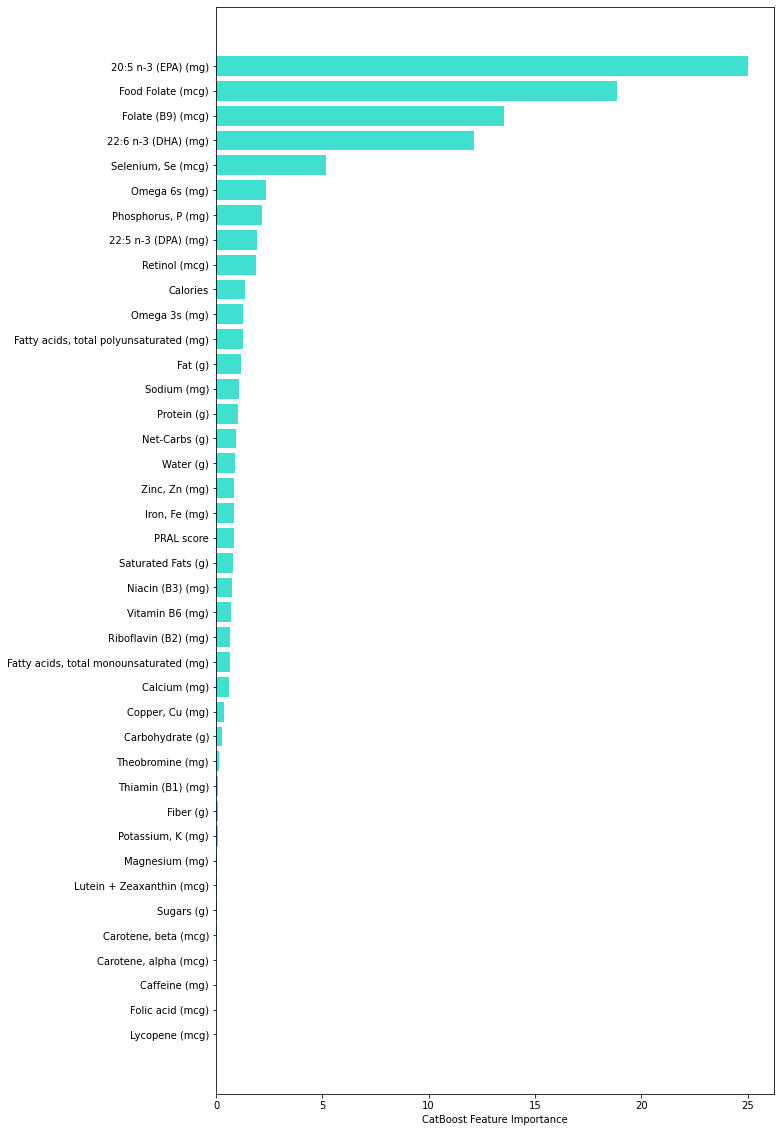

In [21]:
plt.figure(figsize = (10, 20)) 

sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(feature_names[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

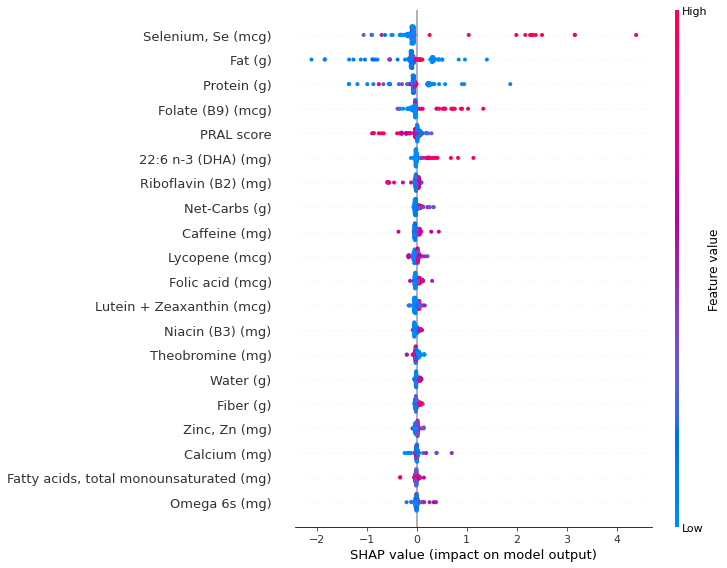

In [23]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = feature_names[sorted_feature_importance])